In [1]:
#%pip install -q -r requirements.txt

# Исследование объявлений о продаже квартир 

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Содержание
1. [Изучение данных из файла](#first)
   1. [Базовая информация на основе Info( )](#first-a)
   2. [Задачи на основании базовой информации info( )](#first-b)
   3. [Первые 5 строк таблицы](#first-f)
   4. [Базовая информация на основе describe( )](#first-c)
   5. [Задачи на основании базовой информации describe( )](#first-d)
   6. [Разделение базы данных на 2 группы: Санкт-Петербург и все остальное](#first-g)
   7. [Вывод](#first-e)
2. [Предобработка данных](#second)
   1. [Обработка пропусков](#second-a)
   2. [Поиск и удаление дубликатов](#second-b)
   3. [Переименование столбцов](#second-c)
   4. [Смена тип данных](#second-d)
   5. [Проверить диапазоны значений](#second-e)
   6. [Вывод](#second-f)
3. [Расчёты и добавление результатов в таблицу](#third)
   1. [Добавляем столбец с ценой за м2](#third-a)
   2. [Добавляем столбец категорию этажа квартиры](#third-b)
   3. [Добавляем столбец отношение жилой к общей площади](#third-c)
   4. [Добавляем столбец отношение площади кухни к общей](#third-d)
   5. [Добавляем столбцы: день недели, месяц, год публикации объявления](#third-e)
   6. [Вывод](#third-f)
4. [Исследовательский анализ данных](#fourth)
   1. [Изучение площади, цены, числа комнат, высоты потолков. Построение гистограмм.](#fourth-a)
   2. [Изучение времени продажи квартиры. Построение гистограмм.](#fourth-b)
   3. [Какие факторы больше всего влияют на стоимость квартиры](#fourth-c)
   4. [Сравнение Санкт - Петербурга и 10 самых популярных населенных пунктов в области.](#fourth-f)
   5. [Изучение влияния удаленности от центра города на стоимость квартиры в Санкт-Петербурге.](#fourth-d)
   6. [Изучение квартир в центре Санкт-Петербурга](#fourth-e)
5. [Общий вывод](#fifth")


## Изучение данных из файла <a id="first"></a>

Открываем файл и создаем DataFrame

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np

In [3]:
data = pd.read_csv('real_estate_data.csv', sep='\t')

### Базовая информация на основе Info( ) <a id="first-a"></a>

In [4]:
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   



В таблице 22 колонки и 23699 строк.  
  
В материалах к заданию описаны значения столбцов:
* `total_images` — число фотографий квартиры в объявлении - **int64**
* `last_price` — цена на момент снятия с публикации - **float64**
* `total_area` — площадь квартиры в квадратных метрах (м²) - **float64**
* `first_day_exposition` — дата публикации - **object**
* `rooms` — число комнат - **int64**
* `ceiling_height` — высота потолков (м) - **float64**
* `floors_total` — всего этажей в доме - **float64**
* `living_area` — жилая площадь в квадратных метрах (м²) - **float64**
* `floor` — этаж - **int64**
* `is_apartment` — апартаменты (булев тип) - **object**
* `studio` — квартира-студия (булев тип) - **bool**
* `open_plan` — свободная планировка (булев тип) - **bool**
* `kitchen_area` — площадь кухни в квадратных метрах (м²) - **float64**
* `balcony` — число балконов - **float64**
* `locality_name` — название населённого пункта - **object**
* `airports_nearest` — расстояние до ближайшего аэропорта в метрах (м) - **float64**
* `cityCenters_nearest` — расстояние до центра города (м) - **float64**
* `parks_around3000` — число парков в радиусе 3 км - **float64**
* `parks_nearest` — расстояние до ближайшего парка (м) - **float64**
* `ponds_around3000` — число водоёмов в радиусе 3 км - **float64**
* `ponds_nearest` — расстояние до ближайшего водоёма (м) - **float64**
* `days_exposition` — сколько дней было размещено объявление (от публикации до снятия) - **float64**

### Задачи на основании базовой информации info( ) <a id="first-b"></a>

1. Поменять название колонки `cityCenters_nearest` на `city_centers_nearest`
2. Сменить тип столбца
 1. first_day_exposition - сменить object на datetime64 (для удобства работы с датой)
 2. is_apartment - сменить object на bool (либо апартаменты, либо нет)
3. Обработать пропущенные значения в столбцах
 1. ceiling_height - 14504 / 23699
 2. floors_total - 23613 / 23699
 3. living_area - 21796 / 23699
 4. is_apartment - 2775 / 23699
 5. kitchen_area - 21421 / 23699
 6. balcony - 12180 / 23699
 7. locality_name - 23650 / 23699
 8. airports_nearest - 18157 / 23699
 9. cityCenters_nearest - 18180 / 23699
 10. parks_around3000 - 18181 / 23699
 11. parks_nearest - 8079 / 23699
 12. ponds_around3000 - 18181 / 23699
 13. ponds_nearest - 9110 / 23699
 14. days_exposition - 20518 / 23699

### Первые 5 строк таблицы <a id="first-f"></a>

In [5]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Дополнительных замечаний, кроме описанных выше нет.

### Базовая информация на основе describe( ) <a id="first-c"></a>

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
total_images,23699.0,9.858475e+00,5.682529e+00,0.0,6.00,9.00,14.0,50.0
last_price,23699.0,6.541549e+06,1.088701e+07,12190.0,3400000.00,4650000.00,6800000.0,763000000.0
total_area,23699.0,6.034865e+01,3.565408e+01,12.0,40.00,52.00,69.9,900.0
rooms,23699.0,2.070636e+00,1.078405e+00,0.0,1.00,2.00,3.0,19.0
ceiling_height,14504.0,2.771499e+00,1.261056e+00,1.0,2.52,2.65,2.8,100.0
floors_total,23613.0,1.067382e+01,6.597173e+00,1.0,5.00,9.00,16.0,60.0
living_area,21796.0,3.445785e+01,2.203045e+01,2.0,18.60,30.00,42.3,409.7
floor,23699.0,5.892358e+00,4.885249e+00,1.0,2.00,4.00,8.0,33.0
kitchen_area,21421.0,1.056981e+01,5.905438e+00,1.3,7.00,9.10,12.0,112.0
balcony,12180.0,1.150082e+00,1.071300e+00,0.0,0.00,1.00,2.0,5.0


### Задачи на основании базовой информации describe( ) <a id="first-d"></a>

1. Проверить минимальные и максимальные значения в столбцах
 1. last_price
 2. total_area
 3. rooms
 4. ceiling_height
 5. living_area
 6. kitchen_area
 7. airports_nearest
 8. parks_nearest

### Разделение базы данных на 2 группы: Санкт-Петербург и все остальное <a id="first-g"></a>
Скорее всего объявлений в Санкт - Петербурге будет львиная доля от общего списка, поэтому имеет смысл его разделить на 2 части, чтобы не искажались данные.
Проверим.

In [7]:
data.groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head()

locality_name
Санкт-Петербург    15721
посёлок Мурино       522
посёлок Шушары       440
Всеволожск           398
Пушкин               369
Name: locality_name, dtype: int64

Гипотеза подтвердилась, делим данные на 2 части.

In [8]:
data_spb = data[data['locality_name'] == 'Санкт-Петербург']
data_spb.groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head()

locality_name
Санкт-Петербург    15721
Name: locality_name, dtype: int64

In [9]:
data_other = data[data['locality_name'] != 'Санкт-Петербург']
data_other.groupby('locality_name')['locality_name'].count().sort_values(ascending=False).head()

locality_name
посёлок Мурино    522
посёлок Шушары    440
Всеволожск        398
Пушкин            369
Колпино           338
Name: locality_name, dtype: int64

### Вывод <a id="first-e"></a>

Каждая строка таблицы содержит информацию о продаваемых квартирах.  
  
Информация поделена на 3 части:
1. Характеристеки квартиры
 1. total_area - общая площадь (м3)
 2. rooms - количество комнат
 3. ceiling_height - высота потолков
 4. living_area - жилая площадь (м3)
 5. floor - этаж
 6. is_apartment - является ли апартаментами
 7. studio - является ли квартирой-студией
 8. open_plan - открытая планировка
 9. kitchen_area - площадь кухни (м3)
 10. balcony - число балконов
2. Местонахождение и географические особенности
 1. floors_total - число этажей в доме
 2. locality_name - в каком населенном пункте расположена
 3. airports_nearest - расстояние до ближайшего аэропорта (м)
 4. cityCenters_nearest - расстояние до городского центра (м)
 5. parks_around3000 - число парков в радиусе 3км
 6. parks_nearest - расстояние до ближайшего парка (м)
 7. ponds_around3000 - число водоемов в радиусе 3км
 8. ponds_nearest - расстояние до ближайшего водоема (м)
3. Данные об объявлении
 1. total_images - число фотографий квартиры в объявлении
 2. last_price - цена на момент снятия с публикации
 3. first_day_exposition - дата публикации
 4. days_exposition - сколько дней размещено объявление (от публикации до снятия)
  
Мы поделии данные на 2 части `data_spb` и `data_other`, что позволит нам ограничить влияние Санкт-Петербурга на остальные регионы.  
Соответсвенно все предобработки мы должны будем делать для обеих частей отдельно.
   
Предобработка данных потребует:
* Поменять название столбца cityCenters_nearest
* Заполнить, по возможности, пропуски
* Проверить дубликаты
* Поменять тип данных в ряде колонок
* Проверить диапазоны значений
* Добавить столбец с ценой за квадратный метр
* Добавить категорию этажа квартиры; варианты — первый, последний, другой;
* Добавить соотношение жилой и общей площади 
* Добавить отношение площади кухни к общей

## Предобработка данных <a id="second"></a>

### Обработка пропусков <a id="second-a"></a>

Сперва еще раз взглянем на кол-во пропущенных значений.

#### Обработка пропусков Санкт - Петербурга.
Сперва взгляним на пропущеные значения по этому региону.

In [10]:
data_spb.shape

(15721, 22)

In [11]:
data_spb.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           5617
floors_total               70
living_area              1140
floor                       0
is_apartment            13888
studio                      0
open_plan                   0
kitchen_area             1379
balcony                  7712
locality_name               0
airports_nearest           85
cityCenters_nearest        61
parks_around3000           61
parks_nearest            8437
ponds_around3000           61
ponds_nearest            7738
days_exposition          2083
dtype: int64

Первое, что бросается в глаза - это апартаменты, количество этажей в доме, высота потолков, наличие балконов.  
* Апартаменты по умолчанию ставим False, т.к. их не так уж и много, учитывая, что они не являются жилплощадью.
* Ячейки с пустым кол-вом этажей можно просто удалить, их всего 70.
* Высоту потолков поставить среднюю.
* Пустые значения в кол-ве балконов заполнить 0.
  
А дальше посмотрим.

##### Удаление пропусков в столбцах `floors_total`, `ceiling_height`, `is_apartment`, `balcony`.

In [12]:
data_spb = data_spb.fillna({'is_apartment':False, 'balcony':0})
data_spb = data_spb.dropna(subset=['floors_total'])
data_spb[['is_apartment', 'balcony', 'floors_total']].isna().sum()

is_apartment    0
balcony         0
floors_total    0
dtype: int64

Тут вроде все ок. Теперь посмотрим повнимательнее на `ceiling_height`.

In [13]:
data_spb['ceiling_height'].describe()

count    10096.000000
mean         2.803717
std          1.297423
min          1.000000
25%          2.550000
50%          2.700000
75%          2.870000
max        100.000000
Name: ceiling_height, dtype: float64

Ну не может быть высота потолков 100 метров, как и 1 впрочем.  
Проверим много ли у нас значений выше 4 метров и ниже 2.4.

In [14]:
data_spb.query('ceiling_height < 2.4')['ceiling_height'].count()

5

In [15]:
data_spb.query('ceiling_height > 4')['ceiling_height'].count()

58

Копейки. Низким квартирам мы пожалуй дадим средние значения, а на высокие посмотрим поближе, возможно это тот самый класс люкс.

In [16]:
(data_spb[['ceiling_height', 'living_area', 'kitchen_area', 'total_area', 'last_price']]
    .query('ceiling_height > 4')
    .sort_values(by=['ceiling_height'], ascending=False)
    .head(20))

,ceiling_height,living_area,kitchen_area,total_area,last_price
22869,100.0,14.0,11.0,25.0,15000000.0
22336,32.0,55.5,16.5,92.4,9999000.0
21377,27.5,37.7,11.0,42.0,4900000.0
17857,27.0,33.0,NaN,56.0,3900000.0
5807,27.0,41.0,12.0,80.0,8150000.0
20478,27.0,22.0,10.0,45.0,8000000.0
5669,26.0,21.3,7.0,50.0,4400000.0
18545,25.0,29.0,NaN,43.0,3750000.0
9379,25.0,30.0,5.2,42.0,3950000.0
4643,25.0,30.0,7.0,45.0,4300000.0


Все, что выше 6 метров выглядит крайне подозрительно, надо устанавливать там средние значения.

In [17]:
data_spb.loc[data_spb['ceiling_height'] < 2.4, ['ceiling_height']] = data_spb[(data_spb['ceiling_height'] > 2.4) | (data_spb['ceiling_height'] <= 6)]['ceiling_height'].mean()
data_spb.loc[data_spb['ceiling_height'] > 6, ['ceiling_height']] = data_spb[(data_spb['ceiling_height'] > 2.4) | (data_spb['ceiling_height'] <= 6)]['ceiling_height'].mean()
data_spb['ceiling_height'].describe()

count    10096.000000
mean         2.764488
std          0.300891
min          2.400000
25%          2.550000
50%          2.700000
75%          2.850000
max          6.000000
Name: ceiling_height, dtype: float64

Другое дело, осталось подставить среднее в пустые значения и мы в дамках.

In [18]:
data_spb = data_spb.fillna({'ceiling_height':data_spb['ceiling_height'].mean()})
data_spb[['ceiling_height']].isna().sum()

ceiling_height    0
dtype: int64

Посмотрим что у нас осталось.

In [19]:
(data_spb[['living_area', 'kitchen_area', 'airports_nearest', 'cityCenters_nearest',
          'parks_around3000', 'parks_nearest', 'ponds_around3000', 'ponds_nearest', 'days_exposition']]
 .isna().sum())

living_area            1117
kitchen_area           1343
airports_nearest         84
cityCenters_nearest      60
parks_around3000         60
parks_nearest          8400
ponds_around3000         60
ponds_nearest          7715
days_exposition        2074
dtype: int64

Из того что осталось бросается в глаза удаленность аэропорта, удаленность от центра города, парки и водоемы в пределах 3 км. Ими и займемся.

##### Удаление пропусков в столбцах `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `ponds_around3000`.
В данных столбцах очень мало пропусков. Нет смысла с ними что то выдумывать, тем более в 3х из них подозрительно одинаковые значения.  
Просто удалим их, особо на таблицу это не повлияет.

In [20]:
data_spb = data_spb.dropna(subset=['airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'ponds_around3000'])
data_spb[['airports_nearest', 'cityCenters_nearest', 'parks_around3000','ponds_around3000']].isna().sum()

airports_nearest       0
cityCenters_nearest    0
parks_around3000       0
ponds_around3000       0
dtype: int64

In [21]:
(data_spb[['living_area', 'kitchen_area', 'parks_nearest', 'ponds_nearest', 'days_exposition']].isna().sum())

living_area        1100
kitchen_area       1326
parks_nearest      8336
ponds_nearest      7639
days_exposition    2037
dtype: int64

Теперь пройдемся по колонкам с самыми большими пропусками, надо добить тему с парками и водоемами.

##### Удаление пропусков в столбцах `parks_nearest`, `ponds_nearest`.
Проверим что они из себя представляют.

In [22]:
data_spb[['parks_nearest', 'ponds_nearest']].describe()

,parks_nearest,ponds_nearest
count,7231.000000,7928.000000
mean,498.401328,520.594854
std,344.323019,280.540569
min,1.000000,13.000000
25%,295.000000,293.000000
50%,460.000000,504.000000
75%,619.000000,739.000000
max,3190.000000,1337.000000


Скорее всего у данных квартир нет поблизости ни парков, ни водоемов. Такое бывает.  
Заполнять такие ячейки глупо, а удалять бессмысленно. Просто оставим как есть.

In [23]:
data_spb[data_spb['parks_around3000'] == 0][['parks_nearest']].isna().sum()

parks_nearest    8336
dtype: int64

In [24]:
data_spb[data_spb['ponds_around3000'] == 0][['ponds_nearest']].isna().sum()

ponds_nearest    7639
dtype: int64

In [25]:
(data_spb[['living_area', 'kitchen_area', 'days_exposition']].isna().sum())

living_area        1100
kitchen_area       1326
days_exposition    2037
dtype: int64

И их осталось трое, последние на проверку, но не по важности. Пожалуй давно пора решить вопрос с жилой площадью и кухней.

##### Удаление пропусков в столбцах `living_area`, `kitchen_area`.
Пустые значения могут означать студии или свободную планировку. Как обычно сперва осмотримся.

In [26]:
data_spb[['living_area', 'kitchen_area']].isna().sum()

living_area     1100
kitchen_area    1326
dtype: int64

In [27]:
data_spb[(data_spb['studio'] == True) | (data_spb['open_plan'] == True)][['living_area', 'kitchen_area']].isna().sum()

living_area       7
kitchen_area    118
dtype: int64

Учитывая, что только 7 квартир являются студиями или имеют открытый план, можно удалить все строки с пропусками в столбце жилая площадь. Скорее всего данные просто не внесли.

In [28]:
data_spb = data_spb.dropna(subset=['living_area'])
data_spb[['living_area', 'kitchen_area']].isna().sum()

living_area       0
kitchen_area    495
dtype: int64

Больше ничего не трогаем. Оставшиеся незаполненные данные в столбце кухня, относятся к студиям. Так же это может быть кухня совмещенная с жилой площадью. Оставим как есть.

##### Удаление пропусков в столбцах `days_exposition`.
Скорее всего, если в данном столбце не указано значение, то объявление на момент получения данных, еще не было закрыто. Заполнять пропуски в этом столбце нет смысла, мы не знаем когда была продана квартира. Удалять же 20% списка, тоже бессмысленно.

---

Проверим, что в итоге получилось.

In [29]:
data_spb.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area             495
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest           7757
ponds_around3000           0
ponds_nearest           7165
days_exposition         1921
dtype: int64

In [30]:
data_spb.shape

(14467, 22)

Таблица похудела на 1300 строк, но зато теперь с ней проще будет работать, перейдем к регионам.

#### Обработка пропусков по области.
Смотрим что у нас тут по пропущеным значениям.

In [31]:
data_other.shape

(7978, 22)

In [32]:
data_other.isna().sum()

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height          3578
floors_total              16
living_area              763
floor                      0
is_apartment            7036
studio                     0
open_plan                  0
kitchen_area             899
balcony                 3807
locality_name             49
airports_nearest        5457
cityCenters_nearest     5458
parks_around3000        5457
parks_nearest           7183
ponds_around3000        5457
ponds_nearest           6851
days_exposition         1098
dtype: int64

По аналогии с Питером.  
* удаляем строки с отсутствующим кол-вом этажей
* апартаменты на False
* Балконы заполняем 0
* удаляем строки с отсутствующей локацией
* выставляем потолки на средние значения

##### Удаление пропусков в столбцах `floors_total`, `ceiling_height`, `is_apartment`, `balcony`, `locality_name`.

In [33]:
data_other = data_other.fillna({'is_apartment':False, 'balcony':0})
data_other = data_other.dropna(subset=['floors_total', 'locality_name'])
data_other[['is_apartment', 'balcony', 'floors_total', 'locality_name']].isna().sum()

is_apartment     0
balcony          0
floors_total     0
locality_name    0
dtype: int64

Перейдем к высоте потолков.

In [34]:
data_other['ceiling_height'].describe()

count    4385.000000
mean        2.696607
std         1.173072
min         1.200000
25%         2.500000
50%         2.600000
75%         2.700000
max        32.000000
Name: ceiling_height, dtype: float64

Ситуация примерно такая же, как и в питерском списке.  
Будем удалять лишние значения и выводить среднее.

In [35]:
data_other.query('ceiling_height < 2.4')['ceiling_height'].count()

16

In [36]:
data_other.query('ceiling_height > 4')['ceiling_height'].count()

17

In [37]:
(data_other[['ceiling_height', 'living_area', 'kitchen_area', 'total_area', 'last_price']]
    .query('ceiling_height > 4')
    .sort_values(by=['ceiling_height'], ascending=False)
    .head(20))

,ceiling_height,living_area,kitchen_area,total_area,last_price
3148,32.0,53.0,8.0,75.0,2900000.0
22938,27.0,73.0,9.0,98.0,4000000.0
10773,27.0,30.1,8.1,58.0,3800000.0
21824,27.0,38.0,8.6,44.0,2450000.0
4876,27.0,17.0,NaN,25.0,3000000.0
5246,27.0,30.0,9.0,54.0,2500000.0
14382,25.0,20.0,8.0,35.0,1700000.0
11285,25.0,17.0,9.0,37.0,1950000.0
355,25.0,32.0,NaN,55.2,3600000.0
6246,25.0,31.3,5.7,44.4,3300000.0


Все, что выше 4,5 метров и ниже 2,4 можно менять на среднее.

In [38]:
data_other.loc[data_other['ceiling_height'] < 2.4, ['ceiling_height']] = (
    data_other[(data_other['ceiling_height'] > 2.4) | (data_other['ceiling_height'] <= 6)]['ceiling_height']
    .mean())
data_other.loc[data_other['ceiling_height'] > 4.5, ['ceiling_height']] = (
    data_other[(data_other['ceiling_height'] > 2.4) | (data_other['ceiling_height'] <= 6)]['ceiling_height']
    .mean())
data_other['ceiling_height'].describe()

count    4385.000000
mean        2.641268
std         0.184012
min         2.400000
25%         2.500000
50%         2.600000
75%         2.700000
max         4.500000
Name: ceiling_height, dtype: float64

Отлично, пропущенные значения заполняем средним.

In [39]:
data_other = data_other.fillna({'ceiling_height':data_other['ceiling_height'].mean()})
data_other[['ceiling_height']].isna().sum()

ceiling_height    0
dtype: int64

##### Удаление пропусков в столбцах `airports_nearest`, `cityCenters_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`, `days_exposition`.

В Ленинградской области вряд ли большое количество парков и водоемов, учитывая, что эти значения заполняются автоматически, имеет смысл оставить их незаполненными. Что касается удаленности от аэропорта и центрального города, населенные пункты могут быть слишком далеко от него, поэтому данные так же не заполнены. Про объявления уже писали, квартиры просто не проданы.  
В итоге все эти строки остаются незаполненными.

In [40]:
(data_other[[
    'airports_nearest', 'cityCenters_nearest', 'parks_around3000', 'parks_nearest', 
    'ponds_around3000', 'ponds_nearest', 'days_exposition']]
     .isna().sum())

airports_nearest       5440
cityCenters_nearest    5441
parks_around3000       5440
parks_nearest          7135
ponds_around3000       5440
ponds_nearest          6814
days_exposition        1097
dtype: int64

##### Удаление пропусков в столбцах `living_area`, `kitchen_area`.
Посмотрим как тут дела обстоят со студиями и свободной планировкой.

In [41]:
data_other[['living_area', 'kitchen_area']].isna().sum()

living_area     748
kitchen_area    879
dtype: int64

In [42]:
data_other[(data_other['studio'] == True) | (data_other['open_plan'] == True)][['living_area', 'kitchen_area']].isna().sum()

living_area      5
kitchen_area    95
dtype: int64

Учитывая, что только 5 квартир являются студиями или имеют открытый план, можно удалить все строки с пропусками в столбце жилая площадь. Кухню оставляем как есть.

In [43]:
data_other = data_other.dropna(subset=['living_area'])
data_other[['living_area', 'kitchen_area']].isna().sum()

living_area       0
kitchen_area    298
dtype: int64

In [44]:
data_other.shape

(7166, 22)

Наша таблица по регионам похудела на 800 строк, но с ней теперь можно работать.

### Поиск и удаление дубликатов <a id="second-b"></a>

Сперва проверим очевидные дубликаты.

In [45]:
data_spb.duplicated().sum()

0

In [46]:
data_other.duplicated().sum()

0

Из имеющихся столбцов дубликаты могут быть только в `locality_name` и только в таблице по регионам.

In [47]:
len(data_other['locality_name'].unique())

347

В списке 347 значений, даже если там есть дубликаты, найти их будет крайне трудно, поэтому оставляем все как есть.

### Переименование столбцов <a id="second-c"></a>
В данном разделе нам требуется сменить имя только в одном столбце `cityCenters_nearest`.

In [48]:
data_spb = data_spb.rename(columns={'cityCenters_nearest': 'city_center_nearest'})
data_spb.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_center_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

In [49]:
data_other = data_other.rename(columns={'cityCenters_nearest': 'city_center_nearest'})
data_other.columns

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_center_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

### Смена типа данных <a id="second-d"></a>
Вспомним, что мы планировали.  
 1. first_day_exposition - сменить object на datetime64 (для удобства работы с датой)
 2. is_apartment - сменить object на bool (либо апартаменты, либо нет)

In [50]:
data_spb.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14467 entries, 0 to 23694
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          14467 non-null  int64  
 1   last_price            14467 non-null  float64
 2   total_area            14467 non-null  float64
 3   first_day_exposition  14467 non-null  object 
 4   rooms                 14467 non-null  int64  
 5   ceiling_height        14467 non-null  float64
 6   floors_total          14467 non-null  float64
 7   living_area           14467 non-null  float64
 8   floor                 14467 non-null  int64  
 9   is_apartment          14467 non-null  bool   
 10  studio                14467 non-null  bool   
 11  open_plan             14467 non-null  bool   
 12  kitchen_area          13972 non-null  float64
 13  balcony               14467 non-null  float64
 14  locality_name         14467 non-null  object 
 15  airports_nearest   

In [51]:
data_spb['first_day_exposition'].head()

0     2019-03-07T00:00:00
2     2015-08-20T00:00:00
4     2018-06-19T00:00:00
9     2017-02-26T00:00:00
10    2017-11-16T00:00:00
Name: first_day_exposition, dtype: object

In [52]:
data_spb['is_apartment'].astype(bool)
data_other['is_apartment'].astype(bool)
data_spb['first_day_exposition'] = pd.to_datetime(data_spb['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
data_other['first_day_exposition'] = pd.to_datetime(data_other['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')

#### Оптимизация хранения данных.

_Функция, возвращающая объем используемой памяти._

In [53]:
def mem_usage(pandas_obj):
    if isinstance(pandas_obj,pd.DataFrame):
        usage_b = pandas_obj.memory_usage(deep=True).sum()
    else: # исходим из предположения о том, что если это не DataFrame, то это Series
        usage_b = pandas_obj.memory_usage(deep=True)
    usage_mb = usage_b / 1024 ** 2 # преобразуем байты в мегабайты
    return "{:03.2f} MB".format(usage_mb)

Сперва замерим текущий объем памяти для списков.

In [54]:
mem_usage(data_spb)

'4.10 MB'

In [55]:
mem_usage(data_other)

'1.97 MB'

Напишем функцию для оптимизации хранения данных в наших таблицах.

In [56]:
def optimise_me(data, my_type, opt_type):
    data_opt = data.select_dtypes(include=[my_type])
    data_opt_conv = data_opt.apply(pd.to_numeric,downcast=opt_type)
    new_data = data
    new_data[data_opt_conv.columns] = data_opt_conv
    return new_data

In [57]:
data_spb = optimise_me(data_spb, 'int', 'unsigned')
data_spb = optimise_me(data_spb, 'float', 'float')
data_other = optimise_me(data_other, 'int', 'unsigned')
data_other = optimise_me(data_other, 'float', 'float')

Так же мы можем заменять строчный тип данных в столбце локация на категорию.  
Количество локаций ограничено.

In [58]:
data_spb['locality_name'] = data_spb['locality_name'].astype('category')
data_other['locality_name'] = data_other['locality_name'].astype('category')

In [59]:
mem_usage(data_spb)

'1.09 MB'

In [60]:
mem_usage(data_other)

'0.61 MB'

Таким образом нам удалось сократить объем памяти для первой таблицы в 4 раза, а для второй в 3 раза.

### Проверить диапазоны значений <a id="second-e"></a>
Посмотрим какие диапазоны значений в таблицах.

#### Проверим диапазон значений списка Санкт-петербурга

In [61]:
data_spb.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_center_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,14467.000000,14467.0,14467.000000,14467.000000,14467.000000,14467.000000,14467.000000,14467.000000,13972.000000,14467.000000,14467.000000,14467.000000,14467.000000,6710.000000,14467.000000,7302.000000,12546.000000
mean,10.337803,7911641.5,64.160339,2.174466,2.762239,11.338494,36.899742,6.214903,11.060643,0.601230,28000.312500,11588.217773,0.624940,495.859772,0.762425,521.894714,184.948669
std,5.746140,12891504.0,38.599636,1.147544,0.241060,6.338062,24.422829,4.874754,6.446157,0.970472,11580.255859,4804.746094,0.786177,340.558228,0.922020,279.881683,225.497086
min,0.000000,12190.0,12.000000,0.000000,2.400000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,4200000.0,42.000000,1.000000,2.600000,5.000000,19.900000,3.000000,7.200000,0.000000,18488.000000,8370.000000,0.000000,295.000000,0.000000,295.250000,41.000000
50%,10.000000,5500000.0,55.000000,2.000000,2.764488,9.000000,31.200001,5.000000,9.800000,0.000000,26662.000000,12252.000000,0.000000,459.000000,1.000000,505.000000,99.000000
75%,15.000000,8000000.0,74.000000,3.000000,2.764488,16.000000,44.000000,8.000000,12.400000,1.000000,36564.000000,14931.000000,1.000000,616.000000,1.000000,741.000000,235.750000
max,50.000000,763000000.0,900.000000,19.000000,6.000000,52.000000,409.700012,33.000000,112.000000,5.000000,54784.000000,29493.000000,3.000000,3190.000000,3.000000,1337.000000,1572.000000


 Вызывают вопросы:
 * `last_price` - слишком низкая минимальная стоимость
 * `rooms` - минимальное количество комнат равно 0
 * `living_area` - минимальная жилая площадь 2 м2 
 * `floor` - минимальный этаж 0 
 * `airports_nearest` - расстояние до аэроворта равно 0 м
  
Так же проверим чтобы этаж квартиры не превышал этажности дома. 
        

Сперва посмотрим на минимальную стоимость квартиры.

In [62]:
data_spb[data_spb['last_price'] < 10**6]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
8793,7,12190.0,109.0,2019-03-20,2,2.75,25.0,32.0,25,False,...,40.5,0.0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,8.0


Удалим эту строку, она явно портит общую картину.

In [63]:
data_spb = data_spb[data_spb['last_price'] > 10**6]
data_spb['last_price'].describe()

count        14466.0
mean       7912187.0
std       12891797.0
min        1190000.0
25%        4200000.0
50%        5500000.0
75%        8000000.0
max      763000000.0
Name: last_price, dtype: float64

Другое дело, дальше посмотрим на количество комнат.

In [64]:
data_spb[data_spb['rooms'] == 0][['rooms', 'studio', 'open_plan', 'total_area']]

,rooms,studio,open_plan,total_area
440,0,True,False,27.110001
1173,0,True,False,29.000000
1174,0,True,False,32.000000
1220,0,True,False,27.000000
1277,0,True,False,26.000000
...,...,...,...,...
22246,0,True,False,27.299999
22832,0,True,False,28.000000
22867,0,True,False,30.000000
22877,0,True,False,28.000000


Похоже на то, что это студии, проверим все ли 0 принадлежат студиям.

In [65]:
data_spb[(data_spb['rooms'] == 0) & (data_spb['studio'] == False)]['rooms'].count()

25

Осталось еще 25 строк, посмотрим на них.

In [66]:
data_spb[(data_spb['rooms'] == 0) & (data_spb['studio'] == False)][['rooms', 'studio', 'open_plan', 'total_area']].head()

,rooms,studio,open_plan,total_area
2532,0,False,True,27.1
4115,0,False,True,24.0
4437,0,False,True,25.0
4683,0,False,True,35.0
6472,0,False,True,28.0


Похоже на то, что это квартиры со свободной планировкой, проверим.

In [67]:
data_spb[(data_spb['rooms'] == 0) & (data_spb['studio'] == False) & (data_spb['open_plan'] == False)][['rooms', 'studio', 'open_plan', 'total_area']].count()

rooms         0
studio        0
open_plan     0
total_area    0
dtype: int64

Отлично тут все в порядке, перейдем к жилой площади.

In [68]:
data_spb[data_spb['living_area'] < 8][['living_area', 'kitchen_area', 'total_area']]

,living_area,kitchen_area,total_area
3242,3.0,11.0,41.000000
13915,2.0,9.0,52.000000
16431,6.0,17.0,31.000000
17582,5.0,NaN,22.000000
19251,6.5,18.0,33.000000
21943,5.4,9.8,77.599998
23574,3.0,16.0,139.000000


Судя по всему здесь ошибка при внесении данных, на всякий случай избавимся от этих строк.

In [69]:
data_spb = data_spb[data_spb['living_area'] > 8]
data_spb['living_area'].describe()

count    14457.000000
mean        36.919804
std         24.418669
min          8.300000
25%         19.900000
50%         31.200001
75%         44.000000
max        409.700012
Name: living_area, dtype: float64

Дальше у нас по плану этаж квартиры, заодно и сравним сразу с этажами дома.

In [70]:
data_spb[data_spb['floor'] == 0][['floor', 'floors_total']]

,floor,floors_total


In [71]:
data_spb['floor'].describe()

count    14457.000000
mean         6.212492
std          4.870765
min          1.000000
25%          3.000000
50%          5.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

Похоже нулевой этаж ушел вместе с жилой зоной или слишком дешевой квартирой, тем лучше.
Далее проверим разницу между этажом квартиры и этажностью дома.

In [72]:
data_spb[data_spb['floor'] > data_spb['floors_total']][['floor']].count()

floor    0
dtype: int64

Отлично, тут тоже все ок. Далее проверим расстояние до аэропорта.

In [73]:
data_spb[data_spb['airports_nearest'] < 5000][['airports_nearest']].count()

airports_nearest    1
dtype: int64

Менее 5 км одно значение, мы его удалим.

In [74]:
data_spb = data_spb[data_spb['airports_nearest'] > 5000]

Быстро пробежимся по второму списку и дальше.

#### Проверим диапазон значений списка регионов

In [75]:
data_other.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,city_center_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,7166.000000,7166.00,7166.000000,7166.000000,7166.000000,7166.000000,7166.000000,7166.000000,6868.000000,7166.000000,2327.000000,2326.000000,2327.000000,739.000000,2327.000000,1050.000000,6136.000000
mean,9.386268,3554057.00,51.460484,1.860033,2.642147,9.249791,29.340204,5.195507,9.344210,0.650851,33586.082031,30762.871094,0.514826,417.849792,0.776536,503.378082,184.282761
std,5.478841,2176144.25,20.920769,0.889939,0.139430,6.792638,13.906544,4.747455,4.022294,0.962878,17201.638672,9112.274414,0.879993,309.435547,1.022075,258.925629,212.486343
min,0.000000,430000.00,17.000000,0.000000,2.400000,1.000000,2.000000,1.000000,2.300000,0.000000,9294.000000,17012.000000,0.000000,4.000000,0.000000,22.000000,3.000000
25%,5.000000,2400000.00,36.912501,1.000000,2.570000,5.000000,18.000000,2.000000,6.587500,0.000000,18569.500000,24885.000000,0.000000,225.000000,0.000000,298.000000,45.000000
50%,9.000000,3200000.00,46.799999,2.000000,2.641268,5.000000,28.000000,4.000000,8.800000,0.000000,26773.000000,30471.000000,0.000000,372.000000,0.000000,488.500000,104.000000
75%,13.000000,4200000.00,60.775000,2.000000,2.641268,12.000000,37.200001,6.000000,10.800000,1.000000,52480.000000,33769.250000,1.000000,531.000000,1.000000,667.500000,244.000000
max,39.000000,42000000.00,380.000000,8.000000,4.500000,60.000000,239.399994,27.000000,64.000000,5.000000,84869.000000,65968.000000,3.000000,2131.000000,3.000000,1344.000000,1580.000000


 Вызывают вопросы:
 * `living_area` - минимальная жилая площадь 2 м2 
  
Так же проверим чтобы этаж квартиры не превышал этажности дома. 

In [76]:
data_other[data_other['living_area'] < 8]

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_center_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
21758,0,2330000.0,23.0,2018-01-01,0,2.641268,24.0,2.0,22,False,...,NaN,0.0,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,66.0


Всего одна строка, удаляем.

In [77]:
data_other = data_other[data_other['living_area'] > 8]
data_other[data_other['floor'] > data_other['floors_total']][['floor']].count()   

floor    0
dtype: int64

---
Проверка диапазона значений закончена.  
Сбросим индексы после всех удалений.

In [78]:
data_spb = data_spb.reset_index(drop=True)
data_other = data_other.reset_index(drop=True)

### Вывод <a id="second-f"></a>

В предобработке данных мы осуществили:
* Обработка пропусков
* Поиск и удаление дубликатов
* Переименование столбцов
* Замену и оптимизацию типа данных
* Проверить диапазоны значений
* Добавляем столбец с ценой за м2
* Добавляем столбец категорию этажа квартиры
* Добавляем столбец отношение жилой к общей площади
* Добавляем столбец отношение площади кухни к общей
* Добавляем столбцы: день недели, месяц, год публикации объявления

При обработке про пропусков мы постарались сохранить большую часть таблиц.  
Много значений, связанных с эропортом, центром города, парком и водоемом, оставили пустыми, т.к. их заполнение исказило бы данные.  
Пустые значения в балконах были заполнены 0, в высоте потолков средним значением, в апартаментах проставили False.  
  
Дубликатов небыло. Переименовали только столбец, отвечающий за расстояние до центра города. И поменяли тип данных в дате и принадлежности к апартаментам.
  
Так же мы проверили диапазоны значений и удалили небольшое кол-во строк с явно ошибочными значениями.

## Расчёты и добавление результатов в таблицу <a id="third"></a>

### Добавляем столбец с ценой за м2 <a id="third-a"></a>

In [79]:
data_spb['price_m2'] = data_spb['last_price'] / data_spb['total_area']
data_spb['price_m2'].describe()

count    1.445600e+04
mean     1.140318e+05
std      5.140921e+04
min      1.534527e+04
25%      9.090494e+04
50%      1.044118e+05
75%      1.237022e+05
max      1.907500e+06
Name: price_m2, dtype: float64

In [80]:
data_other['price_m2'] = data_other['last_price'] / data_other['total_area']
data_other['price_m2'].describe()

count      7165.000000
mean      69576.156250
std       25702.130859
min        9615.384766
25%       53133.515625
50%       69393.937500
75%       85483.867188
max      640422.375000
Name: price_m2, dtype: float64

### Добавляем категорию этажа квартиры <a id="third-b"></a>
Для этого проще всего написать функцию, которая будет вписывать нужную категорию в столбец.  
Мы рассматриваем 3 категории:
* первый - первый этаж
* последний - последний этаж
* прочее - все остальные этажи

In [81]:
def floor_cat(col1, col2):
    if col1 == 1:
        return 'первый'
    elif col1 == col2:
        return 'последний'
    return 'другой'

In [82]:
def fill_cat_floor(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    return 'другой'

In [83]:
data_spb['floor_cat'] = data_spb.apply(fill_cat_floor, axis=1)
data_other['floor_cat'] = data_other.apply(lambda x: floor_cat(x['floor'], x['floors_total']), axis=1)

In [84]:
data_other.groupby('floor_cat')['floor_cat'].count()

floor_cat
другой       4699
первый       1178
последний    1288
Name: floor_cat, dtype: int64

In [85]:
data_spb.groupby('floor_cat')['floor_cat'].count()

floor_cat
другой       11204
первый        1474
последний     1778
Name: floor_cat, dtype: int64

*Для тренировки сделал 2мя разными способами (второй подсмотрел в интернете, но очень уж он понравился).*

### Добавляем соотношение жилой и общей площади <a id="third-c"></a>

In [86]:
data_spb['livin_area_to_total'] = (data_spb['living_area'] / data_spb['total_area']).round(decimals=2)
data_other['livin_area_to_total'] = (data_other['living_area'] / data_other['total_area']).round(decimals=2)

### Добавляем столбец отношение площади кухни к общей <a id="third-d"></a>

In [87]:
data_spb['kitchen_area_to_total'] = (data_spb['kitchen_area'] / data_spb['total_area']).round(decimals=2)
data_other['kitchen_area_to_total'] = (data_other['kitchen_area'] / data_other['total_area']).round(decimals=2)

### Добавляем столбцы: день недели, месяц, год публикации объявления <a id="third-e"></a>

In [88]:
data_spb['dow'] = data_spb['first_day_exposition'].dt.dayofweek
data_other['dow'] = data_other['first_day_exposition'].dt.dayofweek

In [89]:
data_spb['month'] = data_spb['first_day_exposition'].dt.month
data_other['month'] = data_other['first_day_exposition'].dt.month

In [90]:
data_spb['year'] = data_spb['first_day_exposition'].dt.year
data_other['year'] = data_other['first_day_exposition'].dt.year

In [91]:
data_spb[['dow', 'month', 'year']].head()

,dow,month,year
0,3,3,2019
1,3,8,2015
2,1,6,2018
3,6,2,2017
4,3,11,2017


In [92]:
data_other[['dow', 'month', 'year']].head()

,dow,month,year
0,1,12,2018
1,0,9,2018
2,3,11,2017
3,2,5,2018
4,0,8,2018


Посмотрим на итоговые результаты.

In [93]:
data_spb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   total_images           14456 non-null  uint8         
 1   last_price             14456 non-null  float32       
 2   total_area             14456 non-null  float32       
 3   first_day_exposition   14456 non-null  datetime64[ns]
 4   rooms                  14456 non-null  uint8         
 5   ceiling_height         14456 non-null  float32       
 6   floors_total           14456 non-null  float32       
 7   living_area            14456 non-null  float32       
 8   floor                  14456 non-null  uint8         
 9   is_apartment           14456 non-null  bool          
 10  studio                 14456 non-null  bool          
 11  open_plan              14456 non-null  bool          
 12  kitchen_area           13962 non-null  float32       
 13  b

In [94]:
data_other.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7165 entries, 0 to 7164
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   total_images           7165 non-null   uint8         
 1   last_price             7165 non-null   float32       
 2   total_area             7165 non-null   float32       
 3   first_day_exposition   7165 non-null   datetime64[ns]
 4   rooms                  7165 non-null   uint8         
 5   ceiling_height         7165 non-null   float32       
 6   floors_total           7165 non-null   float32       
 7   living_area            7165 non-null   float32       
 8   floor                  7165 non-null   uint8         
 9   is_apartment           7165 non-null   bool          
 10  studio                 7165 non-null   bool          
 11  open_plan              7165 non-null   bool          
 12  kitchen_area           6868 non-null   float32       
 13  bal

#### Оптимизация столбцов.

In [95]:
mem_usage(data_spb)

'2.97 MB'

In [96]:
mem_usage(data_other)

'1.54 MB'

In [97]:
data_spb['floor_cat'] = data_spb['floor_cat'].astype('category')
data_other['floor_cat'] = data_other['floor_cat'].astype('category')

data_spb = optimise_me(data_spb, 'int', 'unsigned')
data_spb = optimise_me(data_spb, 'float', 'float')
data_other = optimise_me(data_other, 'int', 'unsigned')
data_other = optimise_me(data_other, 'float', 'float')

In [98]:
mem_usage(data_spb)

'1.21 MB'

In [99]:
mem_usage(data_other)

'0.67 MB'

### Дополнительная работа после сдачи проекта.

In [100]:
data_spb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   total_images           14456 non-null  uint8         
 1   last_price             14456 non-null  float32       
 2   total_area             14456 non-null  float32       
 3   first_day_exposition   14456 non-null  datetime64[ns]
 4   rooms                  14456 non-null  uint8         
 5   ceiling_height         14456 non-null  float32       
 6   floors_total           14456 non-null  float32       
 7   living_area            14456 non-null  float32       
 8   floor                  14456 non-null  uint8         
 9   is_apartment           14456 non-null  bool          
 10  studio                 14456 non-null  bool          
 11  open_plan              14456 non-null  bool          
 12  kitchen_area           13962 non-null  float32       
 13  b

In [101]:
data_spb.query('(living_area + kitchen_area) > total_area')['living_area'].count()

39

In [102]:
data_other.query('(living_area + kitchen_area) > total_area')['living_area'].count()

25

In [103]:
(data_spb.query('(living_area + kitchen_area) > total_area')
[['living_area', 'kitchen_area', 'total_area', 'last_price', 'ceiling_height',
 'open_plan', 'studio'
 ]]
)

,living_area,kitchen_area,total_area,last_price,ceiling_height,open_plan,studio
100,26.100000,6.200000,30.200001,2600000.0,2.650000,False,False
317,20.000000,5.000000,23.799999,4700000.0,2.764488,False,False
351,48.299999,7.000000,53.700001,5600000.0,2.500000,False,False
412,23.430000,23.430000,34.689999,3364930.0,2.640000,False,False
629,39.000000,20.500000,50.000000,5200000.0,2.764488,False,False
692,33.000000,12.000000,38.000000,7000000.0,3.200000,False,False
822,38.000000,19.000000,54.500000,7300000.0,2.764488,False,False
854,18.000000,18.200001,24.600000,3250000.0,2.764488,False,False
1123,55.000000,14.840000,60.200001,6540000.0,2.764488,False,False
1197,36.400002,8.600000,37.400002,4000000.0,2.530000,False,False


### Вывод <a id="third-f"></a>

В таблицу были добавлены столбцы:
* `price_m2` - стоимость квадратного метра
* `floor_cat` - категория квартиры
* `livin_area_to_total` - отношение жилой площади к общей
* `kitchen_area_to_total` - отношение кухни к общей площади
* `dow` - день недели, когда объявление было размещено
* `month` - месяц, в котором объявление было размещено
* `year` - год, в котором объявление было размещено

В будущем эти данные могут пригодится для проверки гипотез.

## Исследовательский анализ данных <a id="fourth"></a>

### Изучение площади, цены, числа комнат, высоты потолков. Построение гистограмм.<a id="fourth-a"></a>

#### Изучение данных по Санкт-Петербургу
Сперва вспомним какие значения присутствуют в данных столбцах.

In [104]:
data_spb[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,14456.000000,14456.0,14456.000000,14456.000000
mean,64.165794,7909836.0,2.174875,2.762276
std,38.601490,12887229.0,1.147506,0.241105
min,12.000000,1190000.0,0.000000,2.400000
25%,42.000000,4200000.0,1.000000,2.600000
50%,55.000000,5500000.0,2.000000,2.764488
75%,74.000000,8000000.0,3.000000,2.764488
max,900.000000,763000000.0,19.000000,6.000000


Краткие выводы:
* Площадь квартир варьируется от 12 до 900 м2. При минимальном значении речь, скороее всего идет о комнате, при максимальном об элитной недвижимости.
* Цена квартир от 1190000 до 763000000.
* Количество комнат от 0(свободная планировка, студия) до 19.
* Высота потолков везде приммерно одинаковая около 2,7 метров, но встречаются отдельные экземпляры с высотой до 6 метров.  
   
Посмотрим на гистаграммы. Начнем с площади квартиры.

Text(0, 0.5, 'Кол-во квартир, шт')

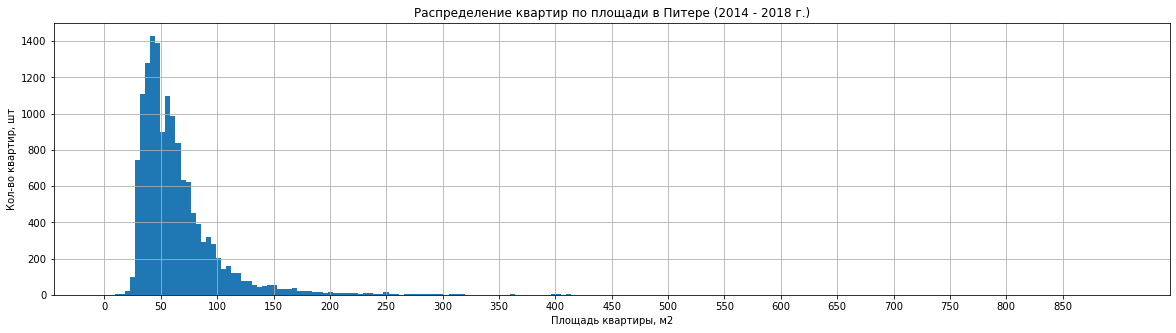

In [105]:
data_spb['total_area'].plot(kind='hist', bins=200, figsize=(20, 5), range=(0, 900), 
                            xticks=range(0, 900, 50), title='Распределение квартир по площади в Питере (2014 - 2018 г.)',
                            grid=True)
plt.xlabel('Площадь квартиры, м2')
plt.ylabel('Кол-во квартир, шт')

In [106]:
data_spb[data_spb['total_area'] > 300]['total_area'].count()

41

Можно заметить, что после 300 значений практически нет, попробуем ограничить диапазон.

Text(0, 0.5, 'Кол-во квартир, шт')

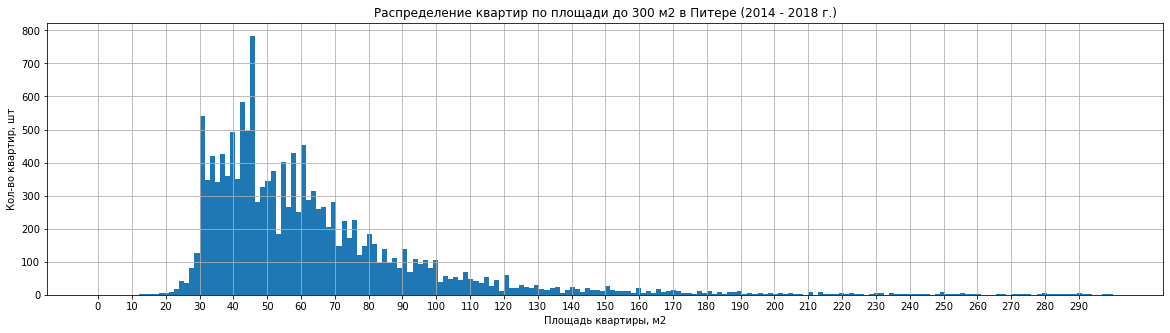

In [107]:
data_spb['total_area'].plot(kind='hist', bins=200, figsize=(20, 5), range=(0, 300), 
                            xticks=range(0, 300, 10), 
                            title='Распределение квартир по площади до 300 м2 в Питере (2014 - 2018 г.)', grid=True)
plt.xlabel('Площадь квартиры, м2')
plt.ylabel('Кол-во квартир, шт')

In [108]:
data_spb[(data_spb['total_area'] >= 30) & (data_spb['total_area'] <= 70)]['total_area'].count()

10029

In [109]:
data_spb[(data_spb['total_area'] < 300) & (data_spb['total_area'] > 70)]['total_area'].count()

4055

In [110]:
data_spb[data_spb['total_area'] < 30]['total_area'].count()

329

Выводы:

* Среднестатистическая квартира имеет площадь от 30 до 70 м2.  
* Чем больше площадь, тем меньше предложений на рынке.  
* Квартир с площадью свыше 300 м2 представлено всего 41.
* Квартир с площадью менее 30 м2 представлено всего 329.
* Квартир с площадью от 30 м2 до 70 м3 в 2,5 раза больше, чем от 70м2 до 300м2.

---

Text(0, 0.5, 'Кол-во квартир, шт')

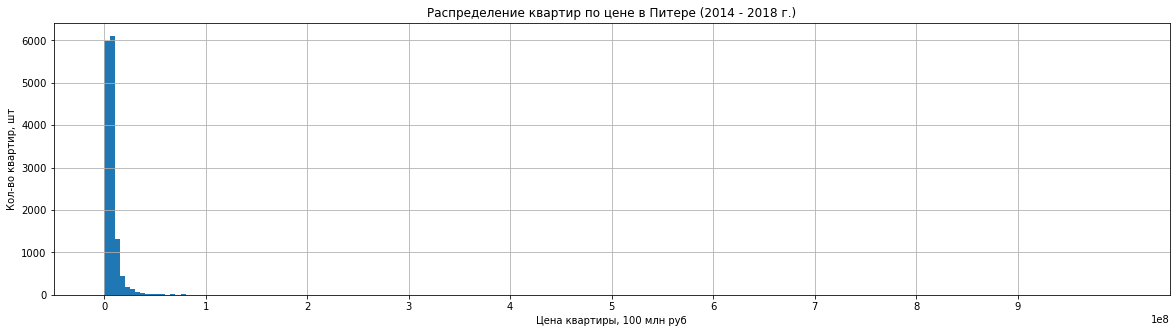

In [111]:
data_spb['last_price'].plot(kind='hist', bins=200, figsize=(20, 5), range=(0, 10**9), 
                            xticks=range(0, 10**9, 10**8), 
                            title='Распределение квартир по цене в Питере (2014 - 2018 г.)', grid=True)
plt.xlabel('Цена квартиры, 100 млн руб')
plt.ylabel('Кол-во квартир, шт')

In [112]:
data_spb[data_spb['last_price'] > 10**8]['last_price'].count()

31

Подовляющее большинство квартир стоит дешевле 100 млн. руб., дороже только 31 квартира.  
Ограничим выборку 100 млн. руб.

Text(0, 0.5, 'Кол-во квартир, шт')

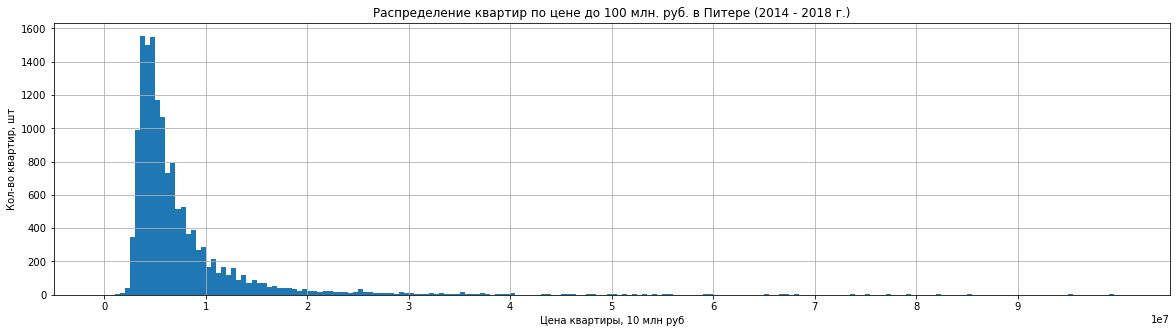

In [113]:
data_spb['last_price'].plot(kind='hist', bins=200, figsize=(20, 5), range=(0, 10**8), 
                            xticks=range(0, 10**8, 10**7), 
                            title='Распределение квартир по цене до 100 млн. руб. в Питере (2014 - 2018 г.)', grid=True)
plt.xlabel('Цена квартиры, 10 млн руб')
plt.ylabel('Кол-во квартир, шт')

In [114]:
data_spb[data_spb['last_price'] > 10**7*2]['last_price'].count()

579

Квартир дороже 20 млн. руб. чуть больше 500, ограничим выборку 20 млн руб.

Text(0, 0.5, 'Кол-во квартир, шт')

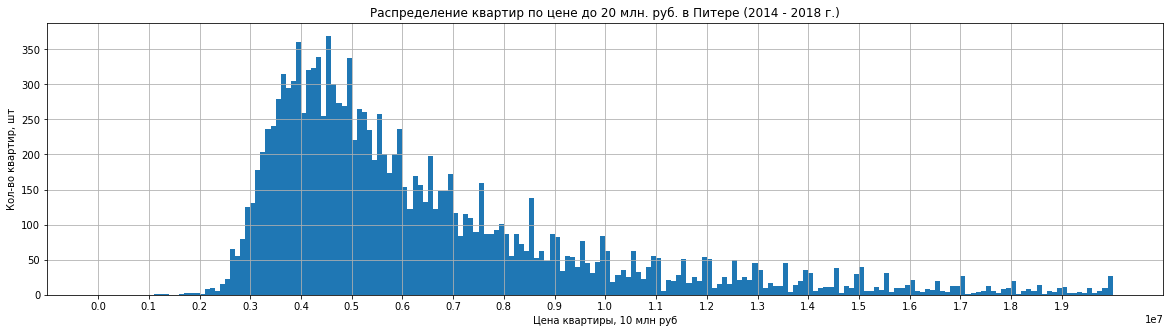

In [115]:
data_spb['last_price'].plot(kind='hist', bins=200, figsize=(20, 5), range=(0, 10**7*2), 
                            xticks=range(0, 10**7*2, 10**6), 
                            title='Распределение квартир по цене до 20 млн. руб. в Питере (2014 - 2018 г.)', grid=True)
plt.xlabel('Цена квартиры, 10 млн руб')
plt.ylabel('Кол-во квартир, шт')

In [116]:
data_spb[(data_spb['last_price'] < 3*10**6)]['last_price'].count()

398

In [117]:
data_spb[(data_spb['last_price'] >= 3*10**6) & (data_spb['last_price'] <= 7*10**6)]['last_price'].count()

9449

In [118]:
data_spb[(data_spb['last_price'] > 7*10**6)]['last_price'].count()

4609

Вывод:  
* самая большая часть квартир представлена в цене от 3 до 7 млн. руб.
* квартир дороже 7 млн. руб. примерно в 2,5 раза меньше всех остальных.
* свыше 5 млн. руб. рост цены на квартиру ведет влечет за собой уменьшение предложения, на лицо обратная зависимость.
* после исследования данных по площади квартир и цены на квартиры мы сожем сделать вывод, что средняя стоимость квадратного метра в Питере составляет чуть больше 100 000 руб.

---

Text(0, 0.5, 'Кол-во квартир, шт')

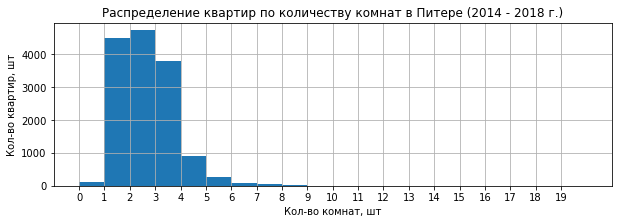

In [119]:
data_spb['rooms'].plot(kind='hist', bins=20, figsize=(10, 3), range=(0, 20), 
                            xticks=range(0, 20), 
                       title='Распределение квартир по количеству комнат в Питере (2014 - 2018 г.)', grid=True)
plt.xlabel('Кол-во комнат, шт')
plt.ylabel('Кол-во квартир, шт')

In [120]:
data_spb[(data_spb['rooms'] >= 4)]['rooms'].count()

1325

In [121]:
data_spb[(data_spb['rooms'] == 0)]['rooms'].count()

102

In [122]:
data_spb[(data_spb['rooms'] >= 1) & (data_spb['rooms'] <= 3)]['rooms'].count()

13029

Вывод:
* больше всего распространены 1, 2 и 3х комнатные квартиры
* преобладают с небольшим отрывом 2х комнатные квартиры
* чуть больше 100 квартир вообще не имеют комнат - в них входят квартиры с открытой планировкой и часть студий
* квартир, имеющих более 3х комнат в 10 раз меньше, чем всех остальных

---

Text(0, 0.5, 'Кол-во квартир, шт')

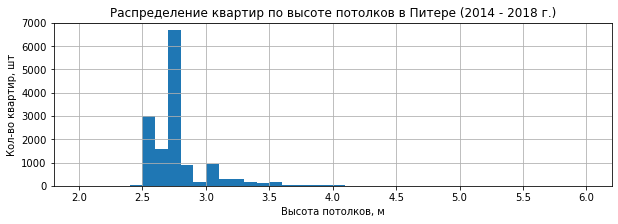

In [123]:
data_spb['ceiling_height'].plot(kind='hist', bins=40, figsize=(10, 3), range=(2, 6), 
                            xticks=[2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6], 
                                title='Распределение квартир по высоте потолков в Питере (2014 - 2018 г.)', 
                                grid=True)
plt.xlabel('Высота потолков, м')
plt.ylabel('Кол-во квартир, шт')

In [124]:
data_spb[(data_spb['ceiling_height'] <= 2.8)]['rooms'].count()

11971

In [125]:
data_spb[(data_spb['ceiling_height'] > 2.8)]['rooms'].count()

2485

In [126]:
data_spb[(data_spb['ceiling_height'] > 4)]['rooms'].count()

33

Вывод:
* большая часть квартир имеет высоту потолков до 2,8 метров включительно
* абсолютное большинство имеет 2,7 метров
* свыше 4 метров высота потолков только у 33 квартир
* ниже 2,4 метров высота потолков в таблице не представлена

#### Изучение данных по области

In [127]:
data_other[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,7165.000000,7165.00,7165.000000,7165.000000
mean,51.464455,3554227.75,1.860293,2.642147
std,20.919518,2176248.50,0.889729,0.139440
min,17.000000,430000.00,0.000000,2.400000
25%,36.950001,2400000.00,1.000000,2.570000
50%,46.799999,3200000.00,2.000000,2.641268
75%,60.799999,4200000.00,2.000000,2.641268
max,380.000000,42000000.00,8.000000,4.500000


Краткие выводы:
* Площадь квартир варьируется от 17 до 380 м2. При минимальном значении речь, скороее всего идет о комнате, при максимальном об элитной недвижимости.
* Цена квартир от 430000 до 42000000 руб.
* Количество комнат от 0(свободная планировка, студия) до 8.
* Высота потолков везде приммерно одинаковая около 2,6 метров, но встречаются отдельные экземпляры с высотой до 4,5 метров.  
   
В целом все примерно тоже самое, что и в Питере, только поскромнее.  
Посмотрим на гистаграммы. Начнем с площади квартиры.

Text(0, 0.5, 'Кол-во квартир, шт')

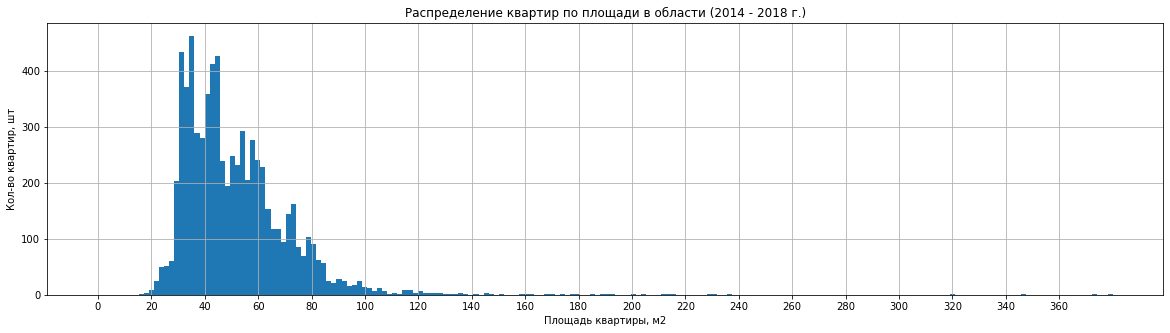

In [128]:
data_other['total_area'].plot(kind='hist', bins=200, figsize=(20, 5), range=(0, 380), 
                            xticks=range(0, 380, 20), 
                              title='Распределение квартир по площади в области (2014 - 2018 г.)', grid=True)
plt.xlabel('Площадь квартиры, м2')
plt.ylabel('Кол-во квартир, шт')

In [129]:
data_other[data_other['total_area'] > 120]['total_area'].count()

63

В Ленинградской области тяжело найти квартиры с площадью свыше 120 м2, из всей выборки их всего то 63.  
Умешим диапазон гистограммы до 120.

Text(0, 0.5, 'Кол-во квартир, шт')

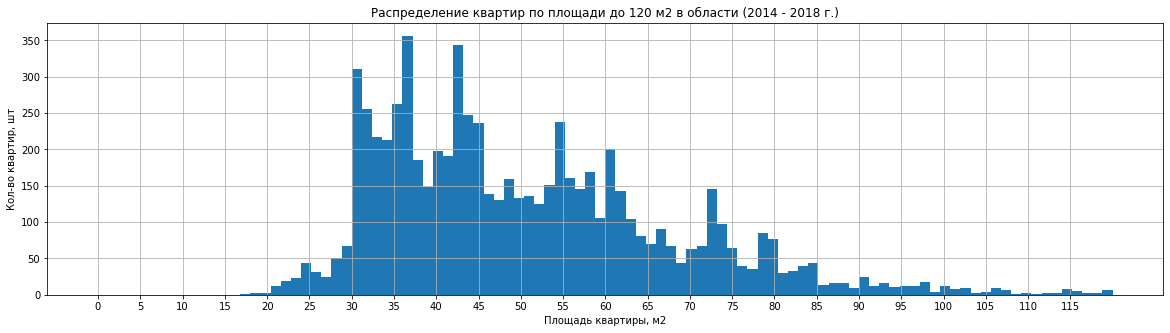

In [130]:
data_other['total_area'].plot(kind='hist', bins=100, figsize=(20, 5), range=(0, 120), 
                            xticks=range(0, 120, 5), 
                              title='Распределение квартир по площади до 120 м2 в области (2014 - 2018 г.)', grid=True)
plt.xlabel('Площадь квартиры, м2')
plt.ylabel('Кол-во квартир, шт')

In [131]:
data_other[(data_other['total_area'] >= 30) & (data_other['total_area'] <= 61)]['total_area'].count()

5153

In [132]:
data_other[data_other['total_area'] > 61]['total_area'].count()

1734

In [133]:
data_other[data_other['total_area'] < 30]['total_area'].count()

278

Выводы:

* Среднестатистическая квартира имеет площадь от 30 до 61 м2. - надо заметить, что верхняя планка ниже чем в Питере
* Чем больше площадь, тем меньше предложений на рынке. - очень тяжело найти квартиру свыше 120 м2 
* Квартир с площадью свыше 120 м2 представлено всего 63. 
* Квартир с площадью менее 30 м2 представлено всего 278.
* Квартир с площадью от 30 м2 до 61 м3 в 3 раза больше, чем от 61м2 и выше.

  
Общий вывод по разнице между Питером и областью:

* Площадь квартир в области больше тяготит к средним значениям, чем в Питере. 
* В Питере в 2 раза больше выбора по вариантам квартир, чем в области.
* В Питере самая большая площадь квартиры в 3 раза больше, чем в области и в целом квартир с большой площадью представлено в разы больше. 

---

Text(0, 0.5, 'Кол-во квартир, шт')

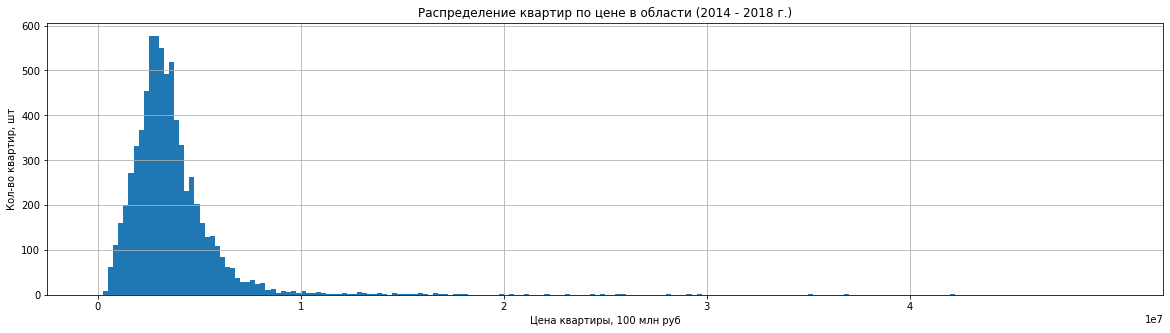

In [134]:
data_other['last_price'].plot(kind='hist', bins=200, figsize=(20, 5), range=(0, 10**7*5), 
                            xticks=range(0, 10**7*5, 10**7), 
                              title='Распределение квартир по цене в области (2014 - 2018 г.)', grid=True)
plt.xlabel('Цена квартиры, 100 млн руб')
plt.ylabel('Кол-во квартир, шт')

In [135]:
data_other[data_other['last_price'] > 10**7]['last_price'].count()

94

Подовляющее большинство квартир стоит дешевле 10 млн. руб., дороже только 94 квартиры. - в Питере порог был примерно раз в 8 выше. 
Ограничим выборку 10 млн. руб.

Text(0, 0.5, 'Кол-во квартир, шт')

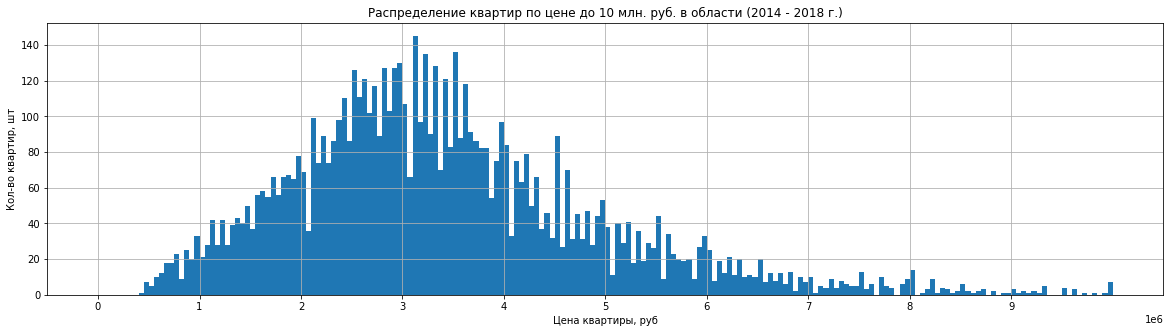

In [136]:
data_other['last_price'].plot(kind='hist', bins=200, figsize=(20, 5), range=(0, 10**7), 
                            xticks=range(0, 10**7, 10**6), 
                              title='Распределение квартир по цене до 10 млн. руб. в области (2014 - 2018 г.)', 
                              grid=True)
plt.xlabel('Цена квартиры, руб')
plt.ylabel('Кол-во квартир, шт')

In [137]:
data_other[data_other['last_price'] > 10**6*3]['last_price'].count()

3948

Квартир дороже 20 млн. руб. чуть больше 500, ограничим выборку 20 млн руб.

In [138]:
data_other[(data_other['last_price'] <= 3*10**6)]['last_price'].count()

3217

Вывод:  
* предложение квартир в регионах плавно увеличивается начиная от 500 тыс. руб. и заканчивая 3 млн руб., после чего происходит такое же плавное уменьшение.
* квартир дешевле 3 млн. руб. примерно на 20% больше, чем от 3 млн. руб. и выше.
* свыше 10 млн руб. представлено всего 94 квартиры.
* в целом цены на квартиры в области примерно в 2 раза ниже, чем в Питере.

---

Text(0, 0.5, 'Кол-во квартир, шт')

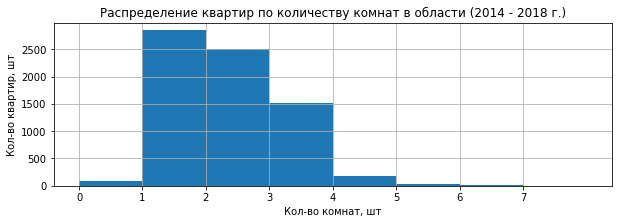

In [139]:
data_other['rooms'].plot(kind='hist', bins=8, figsize=(10, 3), range=(0, 8), 
                            xticks=range(0, 8), 
                         title='Распределение квартир по количеству комнат в области (2014 - 2018 г.)', grid=True)
plt.xlabel('Кол-во комнат, шт')
plt.ylabel('Кол-во квартир, шт')

In [140]:
data_other[(data_other['rooms'] >= 3)]['rooms'].count()

1733

In [141]:
data_other[(data_other['rooms'] == 0)]['rooms'].count()

79

In [142]:
data_other[(data_other['rooms'] >= 1) & (data_other['rooms'] <= 2)]['rooms'].count()

5353

Вывод:
* в отличии от Питера, где преобладают 2х комнатные квартиры, в области больше всего распространены 1-комнатные.
* 1 и 2 комнатные квартиры представлены в 75% объявлений.
* 79 квартир вообще не имеют комнат - в них входят квартиры с открытой планировкой и часть студий.

Общий вывод по Питеру и области:
* предложения квартир в области больше тягатит к 1 и 2 комнатным квартирам, тогда как в Питере в равной степени представлены квартиры 1, 2 и 3 комнатные.
* в области очень трудно найти квартиру свыше 3 комнат, в Питере в этом плане гораздо комфортнее.

---

Text(0, 0.5, 'Кол-во квартир, шт')

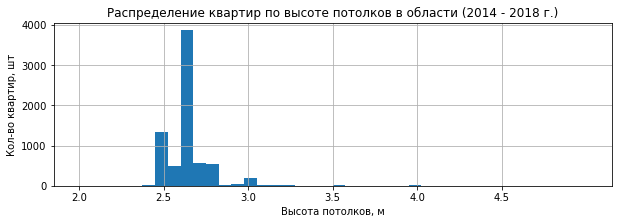

In [143]:
data_other['ceiling_height'].plot(kind='hist', bins=40, figsize=(10, 3), range=(2, 5), 
                            xticks=[2, 2.5, 3, 3.5, 4, 4.5], 
                                  title='Распределение квартир по высоте потолков в области (2014 - 2018 г.)', grid=True)
plt.xlabel('Высота потолков, м')
plt.ylabel('Кол-во квартир, шт')

In [144]:
data_other[(data_other['ceiling_height'] <= 2.8)]['rooms'].count()

6806

In [145]:
data_other[(data_other['ceiling_height'] > 2.8)]['rooms'].count()

359

In [146]:
data_other[(data_other['ceiling_height'] > 3)]['rooms'].count()

107

Вывод:
* большая часть квартир имеет высоту потолков до 2,8 метров включительно
* абсолютное большинство имеет примерно 2,7 метров
* свыше 3 метров высота потолков только у 107 квартир
* ниже 2,4 метров высота потолков в таблице не представлена

Общий вывод по Питеру и области:
* В Питере и области преобладают квартиры с высостой окло 2,7 метров, видимо все дело в единых стандартах для типового жилья.
* При этом в Питере можно найти квартиры с выостой потолков до 6 метров, тогда как в области не представлено выше 4,5 метро.

#### Общий вывод по всему исследованию:
Судя по исследованию, Питер может предложить гораздо большый выбор квартир на любой вкус и цвет.  
При этом цены на квартиры в Питере так же на порядок выше.  
В регионах в основном представлены бюджетные варианты 1-2х комнатных квартир.

### Изучение времени продажи квартиры. Построение гистограмм. <a id="fourth-b"></a>

#### Изучение данных по Санкт-Петербургу
Сперва посмотрим на диапазон значений.

In [147]:
data_spb['days_exposition'].describe()

count    12536.000000
mean       185.007736
std        225.563599
min          1.000000
25%         41.000000
50%         99.000000
75%        236.000000
max       1572.000000
Name: days_exposition, dtype: float64

Медиана и среднее различается в 2 раза, будем строить гистограмму.

Text(0, 0.5, 'Кол-во квартир, шт')

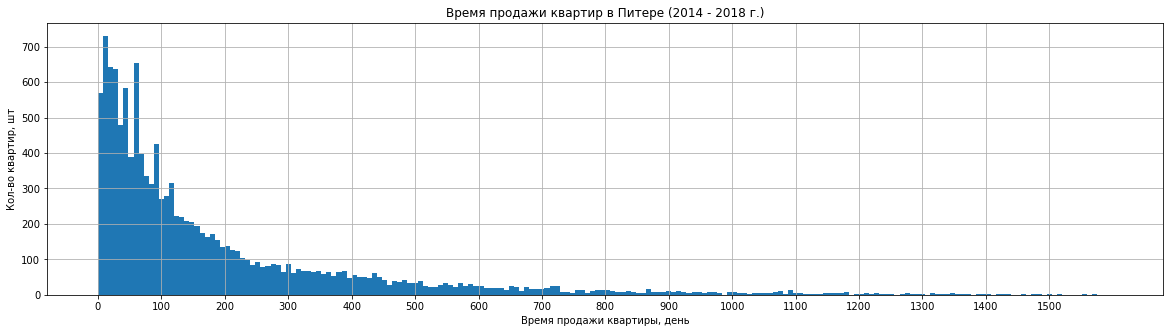

In [148]:
data_spb['days_exposition'].plot(kind='hist', bins=200, figsize=(20, 5), range=(0, 1600), 
                            xticks=range(0, 1600, 100), 
                                 title='Время продажи квартир в Питере (2014 - 2018 г.)', grid=True)
plt.xlabel('Время продажи квартиры, день')
plt.ylabel('Кол-во квартир, шт')

Text(0, 0.5, 'Кол-во квартир, шт')

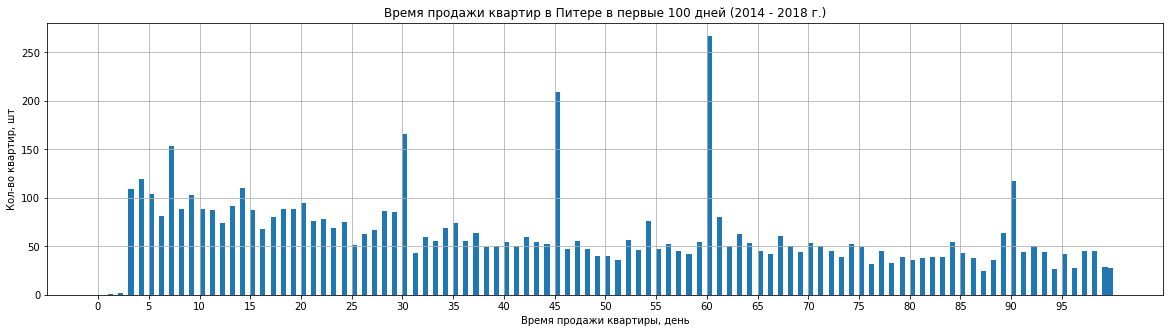

In [149]:
data_spb['days_exposition'].plot(kind='hist', bins=200, figsize=(20, 5), range=(0, 100), 
                            xticks=range(0, 100, 5), 
                                 title='Время продажи квартир в Питере в первые 100 дней (2014 - 2018 г.)', grid=True)
plt.xlabel('Время продажи квартиры, день')
plt.ylabel('Кол-во квартир, шт')

Text(0, 0.5, 'Кол-во квартир, шт')

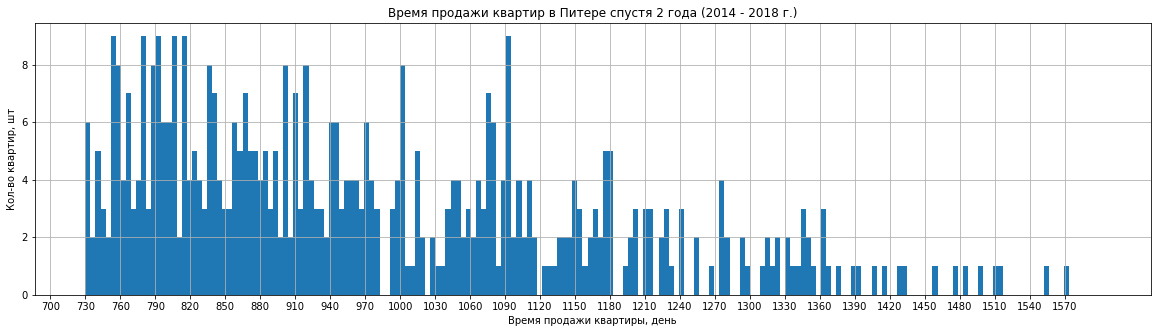

In [150]:
data_spb['days_exposition'].plot(kind='hist', bins=200, figsize=(20, 5), range=(730, 1600), 
                            xticks=range(700, 1600, 30), 
                                 title='Время продажи квартир в Питере спустя 2 года (2014 - 2018 г.)', grid=True)
plt.xlabel('Время продажи квартиры, день')
plt.ylabel('Кол-во квартир, шт')

In [151]:
data_spb[(data_spb['days_exposition'] > 365)]['days_exposition'].count()

1929

In [152]:
data_spb[(data_spb['days_exposition'] < 30)]['days_exposition'].count()

2369

Выводы:
* Судя по графику половина квартир продается в первые 100 дней, это же подтверждает диапазон, который мы смотрели ранее.
* При этом около 15% продаются в первый же месяц, что можно считать быстрой продажей.
* Около 12% квартир продается больше года, их мы можем отнести к долгим продажам.
* В выборке присутствуют квартиры которые продавались свыше 4х лет.
* При ближайшем рассмотрении выборки по первым 100 дням продаж, мы можем наблюдать пики на 30, 45, 60 и 90 днях, при этом с 30 до 60 эти пики растут, а далее спадает.
* Если в первые 100 дней ежедневно продается около 50 квартир, то после 2х лет речь идет об 1 квартире раз в несколько дней.

---

#### Изучение данных по области

In [153]:
data_other['days_exposition'].describe()

count    6135.000000
mean      184.302032
std       212.498947
min         3.000000
25%        45.000000
50%       104.000000
75%       244.000000
max      1580.000000
Name: days_exposition, dtype: float64

Медиана и среднее различается в 2 раза, так же, как и в Питере, только там медиана была больше, а тут среднее.  
Посмотрим что покажет гистограмма.

Text(0, 0.5, 'Кол-во квартир, шт')

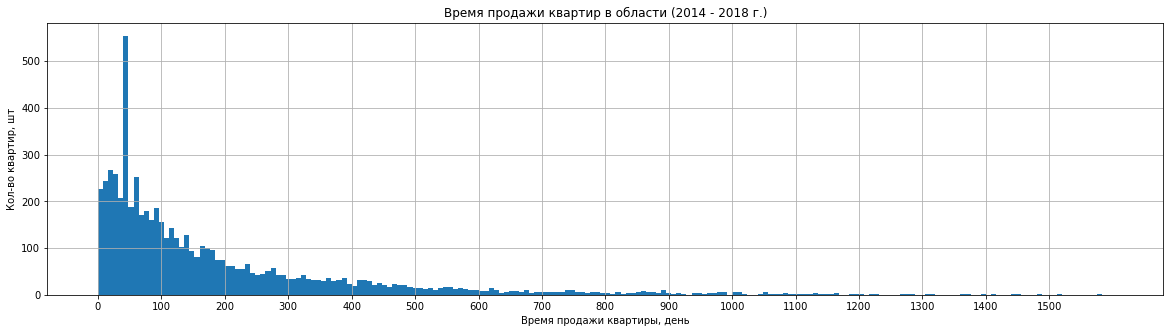

In [154]:
data_other['days_exposition'].plot(kind='hist', bins=200, figsize=(20, 5), range=(0, 1600), 
                            xticks=range(0, 1600, 100), 
                                   title='Время продажи квартир в области (2014 - 2018 г.)', grid=True)
plt.xlabel('Время продажи квартиры, день')
plt.ylabel('Кол-во квартир, шт')

Text(0, 0.5, 'Кол-во квартир, шт')

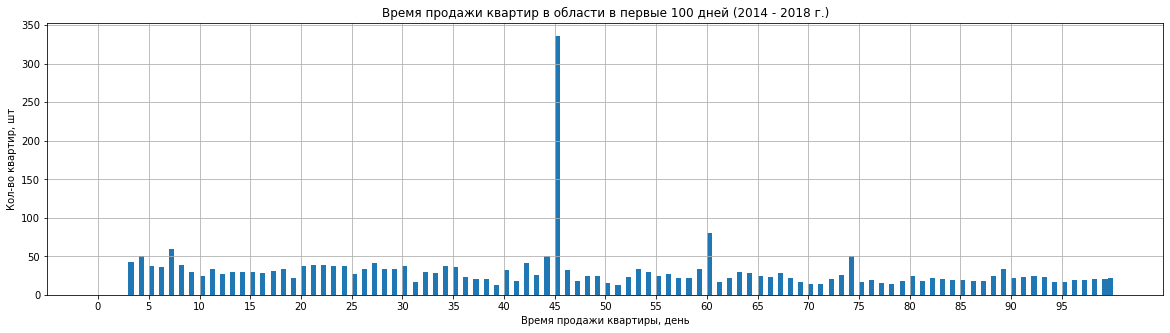

In [155]:
data_other['days_exposition'].plot(kind='hist', bins=200, figsize=(20, 5), range=(0, 100), 
                            xticks=range(0, 100, 5), 
                                   title='Время продажи квартир в области в первые 100 дней (2014 - 2018 г.)', grid=True)
plt.xlabel('Время продажи квартиры, день')
plt.ylabel('Кол-во квартир, шт')

Text(0, 0.5, 'Кол-во квартир, шт')

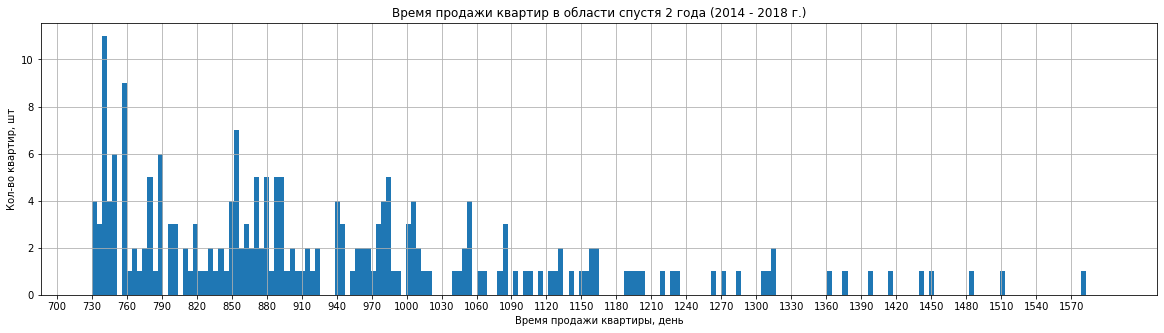

In [156]:
data_other['days_exposition'].plot(kind='hist', bins=200, figsize=(20, 5), range=(730, 1600), 
                            xticks=range(700, 1600, 30), 
                                   title='Время продажи квартир в области спустя 2 года (2014 - 2018 г.)', grid=True)
plt.xlabel('Время продажи квартиры, день')
plt.ylabel('Кол-во квартир, шт')

In [157]:
data_other[(data_other['days_exposition'] > 365)]['days_exposition'].count()

923

In [158]:
data_other[(data_other['days_exposition'] < 30)]['days_exposition'].count()

942

Выводы:
* График более пологий, чем в Питере, квартиры в области продаются дольше.
* В первый месяц продается окло 12% квартир, что можно считать быстрой продажей.
* Примерно столько же продается больше года, их мы можем отнести к долгим продажам.
* В выборке присутствуют квартиры которые продавались свыше 4х лет, как и в Питере.
* При ближайшем рассмотрении выборки по первым 100 дням продаж, мы можем наблюдать пик на 45 день, в этот день продается примерно в 10 раз больше квартир, чем в среднем за первые 100 дней.

#### Дополнительная работа после сдачи проекта

<AxesSubplot:>

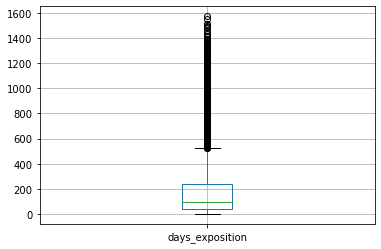

In [159]:
data_spb[['days_exposition']].boxplot()

In [160]:
q1 = data_spb['days_exposition'].quantile(0.25)
q3 = data_spb['days_exposition'].quantile(0.75)
#iqr = q3 - q1 # iqr
# границы интервала наиболее вероятных значений
# q1 - 1.5 * iqr, q3 + 1.5 * iqr

In [161]:
q1

41.0

In [162]:
q3

236.0

In [163]:
iqr = q3 - q1
iqr

195.0

In [164]:
days_ex_border_top = q3 + 1.5 * iqr

In [165]:
data_spb.query('days_exposition > @days_ex_border_top')['days_exposition'].count()

1035

#### Выводы по сравнению скорости продаж в Питере и области:
* Большая часть квартир продается в первый год.
* В Питере квартиры в среднем продаются в 2 раза быстрее, чем в области, при этом % продаж в первые 30 дней примерно одинаковый.
* В Питере в первые 100 дней происходят пики продаж на 30, 45, 60 и 90 день, в это время продается в 3,4,5 и 2 раза больше квартир чем обычно, при этом в области такой день один 45, но в этот день продажи подскакивают в 10 раз.
* Примерно 12% продается свыше года, причем как в Питере, так и в области.

### Убираем редкие значения (дополнительная работа после сдачи проекта)
Уберите редкие и выбивающиеся значения. Опишите, какие особенности обнаружили.

In [166]:
data_spb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14456 entries, 0 to 14455
Data columns (total 29 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   total_images           14456 non-null  uint8         
 1   last_price             14456 non-null  float32       
 2   total_area             14456 non-null  float32       
 3   first_day_exposition   14456 non-null  datetime64[ns]
 4   rooms                  14456 non-null  uint8         
 5   ceiling_height         14456 non-null  float32       
 6   floors_total           14456 non-null  float32       
 7   living_area            14456 non-null  float32       
 8   floor                  14456 non-null  uint8         
 9   is_apartment           14456 non-null  bool          
 10  studio                 14456 non-null  bool          
 11  open_plan              14456 non-null  bool          
 12  kitchen_area           13962 non-null  float32       
 13  b

<AxesSubplot:>

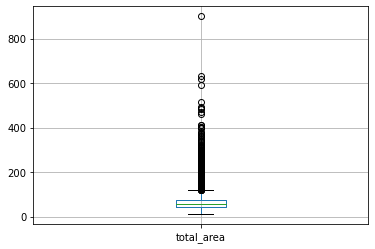

In [167]:
data_spb[['total_area']].boxplot()

In [168]:
q1 = data_spb['total_area'].quantile(0.25)
q1

42.0

In [169]:
q3 = data_spb['total_area'].quantile(0.75)
q3

74.0

In [170]:
iqr = q3 - q1
iqr

32.0

In [171]:
q1 - iqr*1.5

-6.0

In [172]:
spb_total_a_top_b = q3 + iqr*1.5

In [173]:
data_spb.query('total_area > @spb_total_a_top_b')['total_area'].count()

824

### Какие факторы больше всего влияют на стоимость квартиры <a id="fourth-c"></a>
Мы должны проверить зависит ли цена от:
* размера квартиры
* числа комнат
* этажа
* удаленности от центра
* даты размещения: дня недели, месяца, года

#### Изучение данных по Санкт-Петербургу
Сперва посмотрим на корреляцию цены и числовых столбцов.

In [174]:
data_spb[['last_price', 'total_area', 'rooms', 'city_center_nearest', 'dow', 'month', 'year']].corr()

,last_price,total_area,rooms,city_center_nearest,dow,month,year
last_price,1.000000,0.639525,0.365485,-0.253919,0.005111,-0.002063,-0.040091
total_area,0.639525,1.000000,0.777957,-0.342589,-0.003633,-0.001588,-0.088216
rooms,0.365485,0.777957,1.000000,-0.295706,-0.005284,-0.010350,-0.059125
city_center_nearest,-0.253919,-0.342589,-0.295706,1.000000,-0.000048,0.010386,0.082027
dow,0.005111,-0.003633,-0.005284,-0.000048,1.000000,0.006104,-0.005270
month,-0.002063,-0.001588,-0.010350,0.010386,0.006104,1.000000,-0.265193
year,-0.040091,-0.088216,-0.059125,0.082027,-0.005270,-0.265193,1.000000


Краткий вывод:
1. цена на квартиру имеет самую большую зависимость от общей площади квартиры
2. второй по зависимости величиной является кол-во комнат
3. при этом удаленность от центра имеет отрицательную зависимоть, т.е. чем ближе центр города, тем выше цена
4. что касается дня недели, месяца, года размещения объявления, то наибольшая взаимосвязь прослеживается с годом, причем судя по всему в период выборки квартиры незначительно дешевели с каждым годом
  
Проверим все эти связи на графиках.

##### Зависимость стоимости квартиры от ее площади.

Text(0.5, 0, 'Цена квартиры, 100 млн руб')

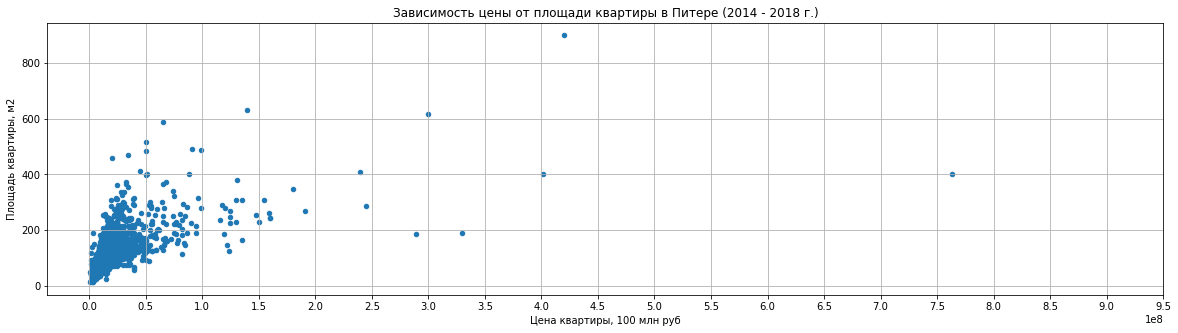

In [175]:
data_spb.sort_values(by='last_price').plot(
    kind='scatter', x = 'last_price', y = 'total_area', figsize=(20, 5), 
    xticks=range(0, 10**9, 10**7*5), title='Зависимость цены от площади квартиры в Питере (2014 - 2018 г.)', 
    grid=True)
plt.ylabel('Площадь квартиры, м2')
plt.xlabel('Цена квартиры, 100 млн руб')

Вывод:
* С ростом площади квартиры растет и ее минимальная стоимость.
* При этом максимальная стоимость практически не зависит от площади.
* По всей видимости есть определенный минимум стоимости 1 м2 жилья для каждого типа квартир, после которого начинают подключаться другие параметры, такие как: расположение, этаж, характеристики дома и прочее.

##### Зависимость стоимости квартиры от количества комнат

Text(0, 0.5, 'Кол-во комнат, шт')

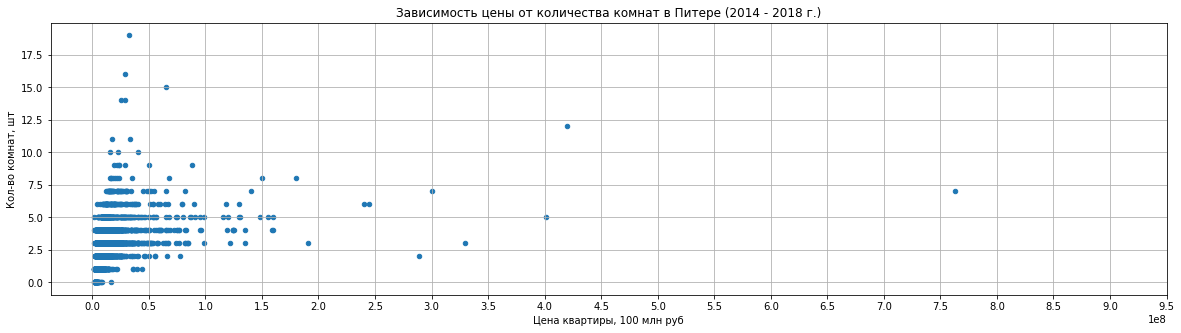

In [176]:
data_spb.sort_values(by='last_price').plot(
    kind='scatter', x = 'last_price', y = 'rooms', figsize=(20, 5), 
    xticks=range(0, 10**9, 10**7*5), title='Зависимость цены от количества комнат в Питере (2014 - 2018 г.)', 
    grid=True)
plt.xlabel('Цена квартиры, 100 млн руб')
plt.ylabel('Кол-во комнат, шт')

Вывод:  
* Зависимость напоминает зависимость стоимости от площади недвижимости
* Прослеживается логика, что с ростом числа комнат, растет площадь
* При этом корреляция стоимости с площадью выше, т.к. она может расти и без увеличения числа комнат

##### Зависимость стоимости квартиры от категории этажа: первый, последний, другой.

Text(0, 0.5, 'Цена квартиры, 100 млн руб')

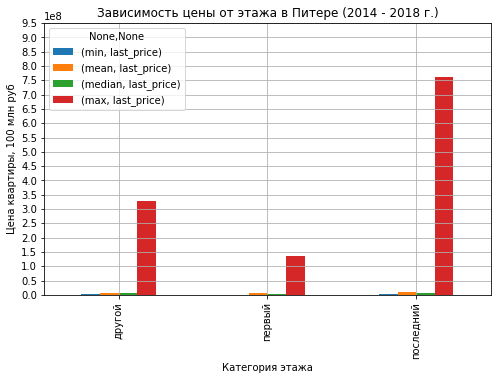

In [177]:
(data_spb
 .pivot_table(index='floor_cat', values='last_price', aggfunc=['min', 'mean', 'median', 'max'])
 .plot(kind='bar', figsize=(8,5), yticks=range(0, 10**9, 10**7*5), 
       title='Зависимость цены от этажа в Питере (2014 - 2018 г.)', grid=True))
plt.xlabel('Категория этажа')
plt.ylabel('Цена квартиры, 100 млн руб')

По максимальным значения явно лидирует последний этаж, а в аутсайдерах первый.  
Попробуем построить график без максимальных значений.

Text(0, 0.5, 'Цена квартиры, 100 млн руб')

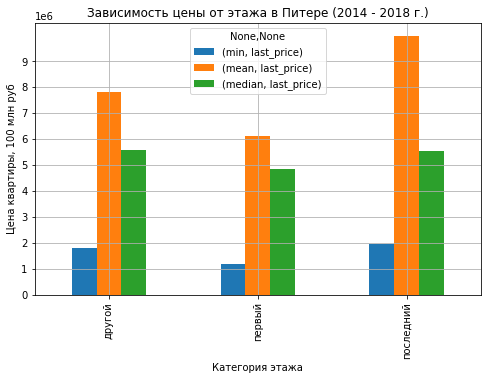

In [178]:
(data_spb
 .pivot_table(index='floor_cat', values='last_price', aggfunc=['min', 'mean', 'median'])
 .plot(kind='bar', figsize=(8,5), yticks=range(0, 10**7, 10**6), 
       title='Зависимость цены от этажа в Питере (2014 - 2018 г.)', grid=True))
plt.xlabel('Категория этажа')
plt.ylabel('Цена квартиры, 100 млн руб')

Выводы:
* Стоимость жилья, по возрастанию: первый, другой, последний.
* Различие по медиане гораздо меньше, чем по среднему, за счет разницы больших максимальных цен.

##### Зависимость стоимости квартиры от удаленности от центра города.

Text(0, 0.5, 'Удаленность от центра, м')

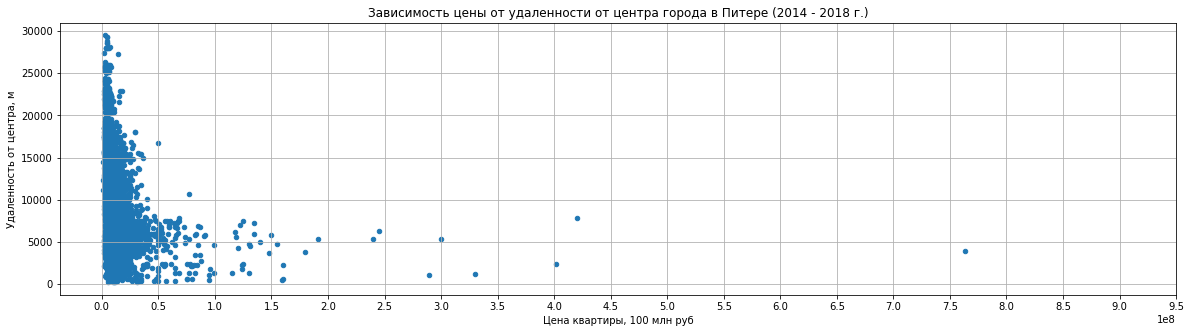

In [179]:
data_spb.sort_values(by='last_price').plot(
    kind='scatter', x = 'last_price', y = 'city_center_nearest', figsize=(20, 5), 
    xticks=range(0, 10**9, 10**7*5), title='Зависимость цены от удаленности от центра города в Питере (2014 - 2018 г.)', 
    grid=True)
plt.xlabel('Цена квартиры, 100 млн руб')
plt.ylabel('Удаленность от центра, м')

Вывод:  
* По графику видно, что чем ближе к центру города, тем больше растет цена. 
* Все самые дорогие квартиры находятся в пределах 10 км.
* На расстоянии свыше  20 км от центра города квартир дороже 25 млн. руб. нет.

##### Зависимость стоимости квартиры от даты размещения: день недели, месяц, год.

Text(0, 0.5, 'Стоимость квартиры, 100 млн')

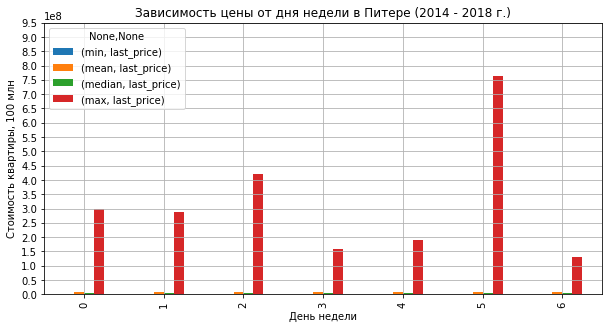

In [180]:
(data_spb
 .pivot_table(index='dow', values='last_price', aggfunc=['min', 'mean', 'median', 'max'])
 .plot(kind='bar', figsize=(10,5), yticks=range(0, 10**9, 10**7*5), 
       title='Зависимость цены от дня недели в Питере (2014 - 2018 г.)', grid=True))
plt.xlabel('День недели')
plt.ylabel('Стоимость квартиры, 100 млн')

Квартира с самой большой ценой была размещена в субботу.   
Далее лидируют среда, понедельник и вторник.   
Замыкают пятница, четверг и воскресенье.  
  
Уберем из графика максимальные значения.

Text(0, 0.5, 'Стоимость квартиры, 100 млн')

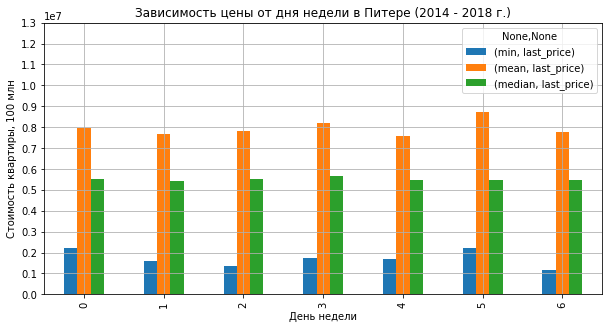

In [181]:
(data_spb
 .pivot_table(index='dow', values='last_price', aggfunc=['min', 'mean', 'median'])
 .plot(kind='bar', figsize=(10,5), yticks=range(0, 10**6*14, 10**6), 
       title='Зависимость цены от дня недели в Питере (2014 - 2018 г.)', grid=True))
plt.xlabel('День недели')
plt.ylabel('Стоимость квартиры, 100 млн')

Выводы: 
* То, что максимальные цены были в определенные дни недели, скорее всего является случайностью.
* Во все дни недели выставляются квартиры примерно одной стоимости.

Text(0, 0.5, 'Стоимость квартиры, 100 млн руб')

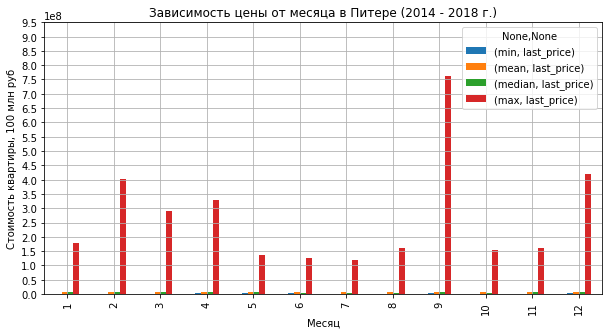

In [182]:
(data_spb
 .pivot_table(index='month', values='last_price', aggfunc=['min', 'mean', 'median', 'max'])
 .plot(kind='bar', figsize=(10,5), yticks=range(0, 10**9, 10**7*5), 
       title='Зависимость цены от месяца в Питере (2014 - 2018 г.)', grid=True))
plt.xlabel('Месяц')
plt.ylabel('Стоимость квартиры, 100 млн руб')

Самая дорогая квартира выставлялась в сентябре, так же лидируют декабрь, февраль, апрель и май.  
Строим диаграмму без максимума.

Text(0, 0.5, 'Стоимость квартиры, 100 млн руб')

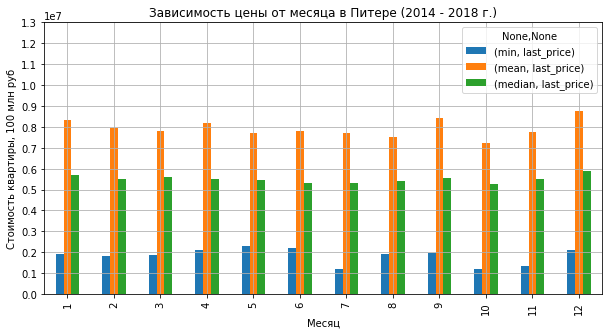

In [183]:
(data_spb
 .pivot_table(index='month', values='last_price', aggfunc=['min', 'mean', 'median'])
 .plot(kind='bar', figsize=(10,5), yticks=range(0, 10**6*14, 10**6), 
       title='Зависимость цены от месяца в Питере (2014 - 2018 г.)', grid=True))
plt.xlabel('Месяц')
plt.ylabel('Стоимость квартиры, 100 млн руб')

Вывод: зависимость не прослеживается.

Text(0, 0.5, 'Стоимость квартиры, 100 млн руб')

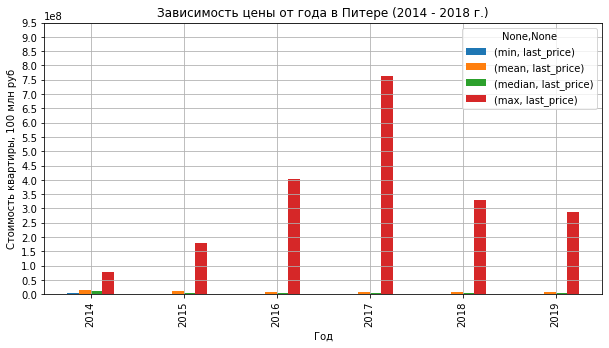

In [184]:
(data_spb
 .pivot_table(index='year', values='last_price', aggfunc=['min', 'mean', 'median', 'max'])
 .plot(kind='bar', figsize=(10,5), yticks=range(0, 10**9, 10**7*5), 
       title='Зависимость цены от года в Питере (2014 - 2018 г.)', grid=True))
plt.xlabel('Год')
plt.ylabel('Стоимость квартиры, 100 млн руб')

Максимальная цена квартиры возрастала от 2014 к 2017 году, после чего началось снижение.  
Уберем максимум.

Text(0, 0.5, 'Стоимость квартиры, 100 млн руб')

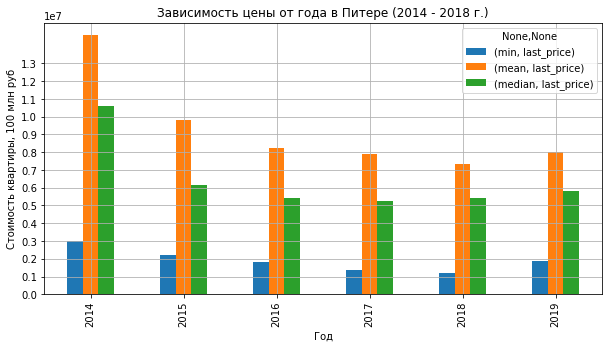

In [185]:
(data_spb
 .pivot_table(index='year', values='last_price', aggfunc=['min', 'mean', 'median'])
 .plot(kind='bar', figsize=(10,5), yticks=range(0, 10**6*14, 10**6), 
       title='Зависимость цены от года в Питере (2014 - 2018 г.)', grid=True))
plt.xlabel('Год')
plt.ylabel('Стоимость квартиры, 100 млн руб')

Вывод:
* Возрастаение максимальной цены от 2014 года к 2017 и последующее уменьшение - может быть следствием совпадения.
* По медиане и средней цене мы можем наблюдать резкое снижение в 2014 году(как раз тогда рубль резко упал) с последующей постепенной стагнацией.

#### Изучение данных по области
Посмотрим диапазон значений.

In [186]:
data_other[['last_price', 'total_area', 'rooms', 'city_center_nearest', 'dow', 'month', 'year']].corr()

,last_price,total_area,rooms,city_center_nearest,dow,month,year
last_price,1.000000,0.724864,0.417519,-0.018665,-0.019420,0.011710,-0.027398
total_area,0.724864,1.000000,0.782460,0.021442,-0.008827,0.008449,-0.045370
rooms,0.417519,0.782460,1.000000,0.134039,0.004044,-0.000374,-0.028650
city_center_nearest,-0.018665,0.021442,0.134039,1.000000,0.015933,-0.036044,-0.011237
dow,-0.019420,-0.008827,0.004044,0.015933,1.000000,0.025108,-0.010752
month,0.011710,0.008449,-0.000374,-0.036044,0.025108,1.000000,-0.238105
year,-0.027398,-0.045370,-0.028650,-0.011237,-0.010752,-0.238105,1.000000


Краткий вывод:
1. Цена на квартиру имеет большую зависимость от площади, чем в Питере. Видимо это связано с меньшим количеством других факторов, влияющих на цену.
2. Второй по зависимости величиной является кол-во комнат, как в Питере.
3. Остальные факторы практически не коррелируют с ценой.

Посмотрим графики.

##### Зависимость стоимости квартиры от ее площади.

Text(0, 0.5, 'Площадь квартиры, м2')

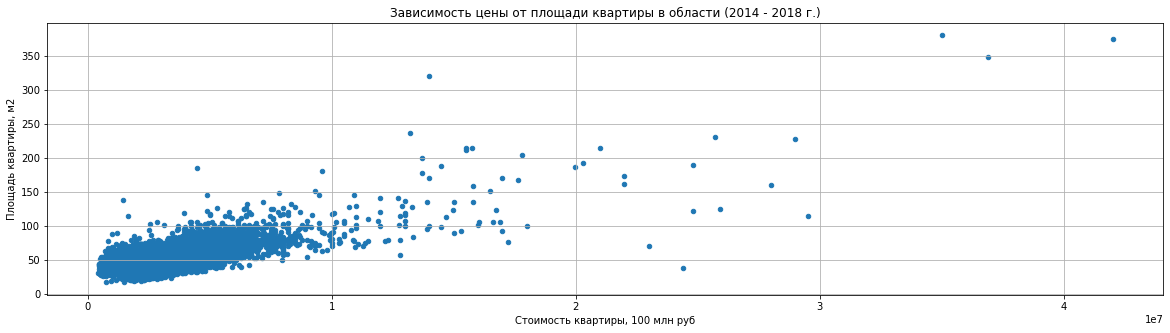

In [187]:
data_other.sort_values(by='last_price').plot(
    kind='scatter', x = 'last_price', y = 'total_area', figsize=(20, 5), 
    xticks=range(0, 10**7*5, 10**7), title='Зависимость цены от площади квартиры в области (2014 - 2018 г.)', 
    grid=True)
plt.xlabel('Стоимость квартиры, 100 млн руб')
plt.ylabel('Площадь квартиры, м2')

Вывод:
* Прослеживается более четкая зависимость между стоимостью квартиры и ее площадью.
* Самые дорогие квартиры имеют самую большую площадь.

##### Зависимость стоимости квартиры от количества комнат

Text(0, 0.5, 'Кол-во комнат, шт')

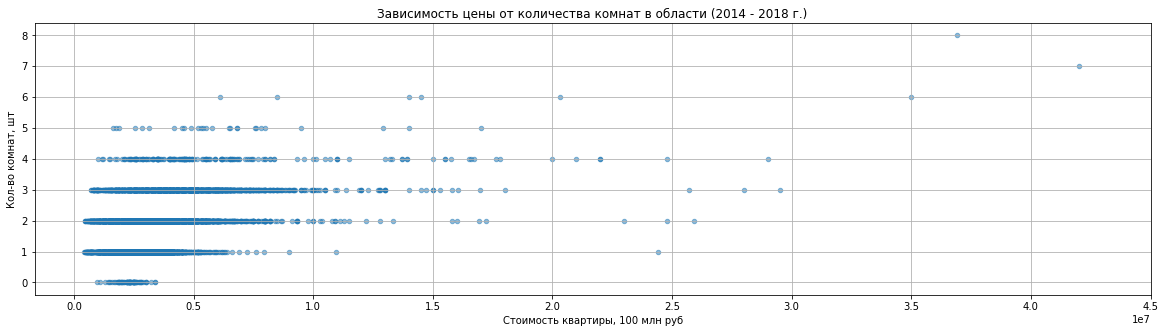

In [188]:
data_other.sort_values(by='last_price').plot(
    kind='scatter', x = 'last_price', y = 'rooms', figsize=(20, 5), alpha=0.5,
    xticks=range(0, 10**7*5, 10**6*5), title='Зависимость цены от количества комнат в области (2014 - 2018 г.)', grid=True)
plt.xlabel('Стоимость квартиры, 100 млн руб')
plt.ylabel('Кол-во комнат, шт')

Вывод:  
* Примерно то же, что и в Питере - чем больше кол-во комнат, тем выше цена.

##### Зависимость стоимости квартиры от категории этажа: первый, последний, другой.

Text(0, 0.5, 'Стоимость квартиры, 100 млн руб')

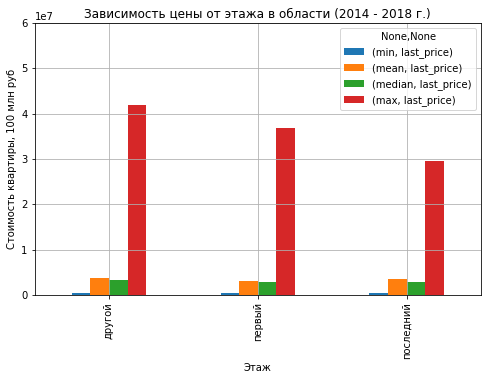

In [189]:
(data_other
 .pivot_table(index='floor_cat', values='last_price', aggfunc=['min', 'mean', 'median', 'max'])
 .plot(kind='bar', figsize=(8,5), yticks=range(0, 10**7*7, 10**7), 
       title='Зависимость цены от этажа в области (2014 - 2018 г.)', grid=True))
plt.xlabel('Этаж')
plt.ylabel('Стоимость квартиры, 100 млн руб')

В отличии от Питера, последний этаж среди максимальных цен в аутсайдерах. Самые дорогие квартиры между первым и последним этажом.  
Попробуем построить график без максимальных значений.

Text(0, 0.5, 'Стоимость квартиры, 100 млн руб')

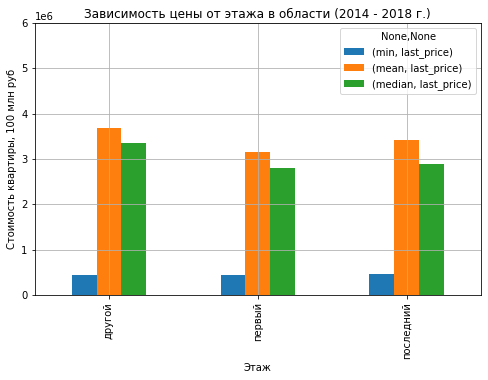

In [190]:
(data_other
 .pivot_table(index='floor_cat', values='last_price', aggfunc=['min', 'mean', 'median'])
 .plot(kind='bar', figsize=(8,5), yticks=range(0, 10**6*7, 10**6), 
       title='Зависимость цены от этажа в области (2014 - 2018 г.)', grid=True))
plt.xlabel('Этаж')
plt.ylabel('Стоимость квартиры, 100 млн руб')

Выводы:
* Стоимость жилья примерно одинаковая, чуть выше на этажах между первым и последним.

##### Зависимость стоимости квартиры от удаленности от центра города.

Text(0, 0.5, 'Удаленность от центра города, м')

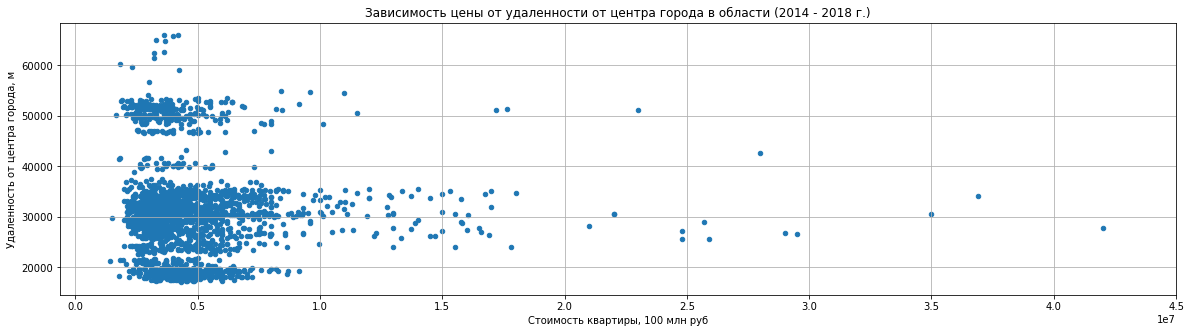

In [191]:
data_other.sort_values(by='last_price').plot(
    kind='scatter', x = 'last_price', y = 'city_center_nearest', figsize=(20, 5), 
    xticks=range(0, 10**7*5, 10**6*5), title='Зависимость цены от удаленности от центра города в области (2014 - 2018 г.)', 
    grid=True)
plt.xlabel('Стоимость квартиры, 100 млн руб')
plt.ylabel('Удаленность от центра города, м')

Вывод:  
* По графику видно, что чем ближе к центру города, тем больше растет цена - по аналогии с Питером. 
* Все самые дорогие квартиры находятся в пределах 35 км.
* В целом удаленность практически не влияет на стоимость квартиры.

##### Зависимость стоимости квартиры от даты размещения: день недели, месяц, год.

Text(0, 0.5, 'Стоимость квартиры, 100 млн руб')

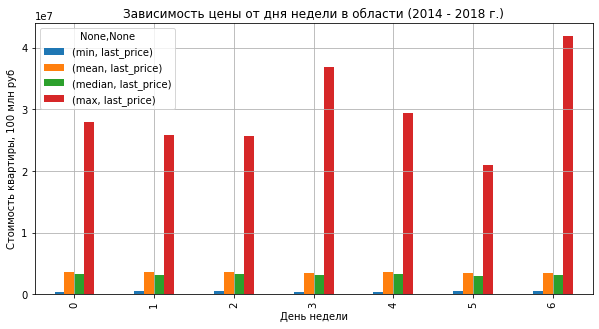

In [192]:
(data_other
 .pivot_table(index='dow', values='last_price', aggfunc=['min', 'mean', 'median', 'max'])
 .plot(kind='bar', figsize=(10,5), yticks=range(0, 10**7*5, 10**7), 
       title='Зависимость цены от дня недели в области (2014 - 2018 г.)', grid=True))
plt.xlabel('День недели')
plt.ylabel('Стоимость квартиры, 100 млн руб')

По максимально цене практически нет разницы.
  
Уберем из графика максимальные значения.

Text(0, 0.5, 'День недели')

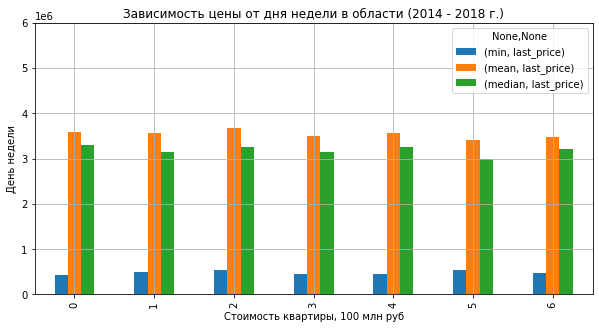

In [193]:
(data_other
 .pivot_table(index='dow', values='last_price', aggfunc=['min', 'mean', 'median'])
 .plot(kind='bar', figsize=(10,5), yticks=range(0, 10**6*7, 10**6), 
       title='Зависимость цены от дня недели в области (2014 - 2018 г.)', grid=True))
plt.xlabel('Стоимость квартиры, 100 млн руб')
plt.ylabel('День недели')

Выводы: 
* Во все дни недели выставляются квартиры примерно одной стоимости.

Text(0, 0.5, 'Стоимость квартиры, 100 млн руб')

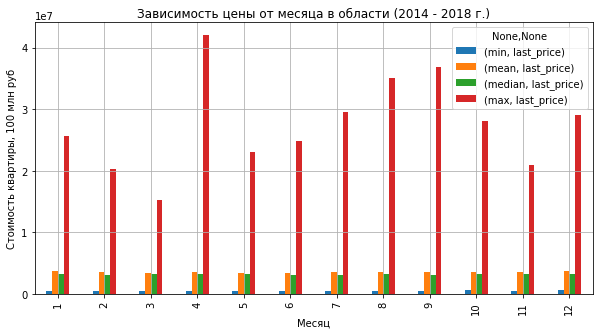

In [194]:
(data_other
 .pivot_table(index='month', values='last_price', aggfunc=['min', 'mean', 'median', 'max'])
 .plot(kind='bar', figsize=(10,5), yticks=range(0, 10**7*5, 10**7), 
       title='Зависимость цены от месяца в области (2014 - 2018 г.)', grid=True))
plt.xlabel('Месяц')
plt.ylabel('Стоимость квартиры, 100 млн руб')

Самая дорогая квартира выставлялась в апреле, так же лидируют сентябрь и август.  
Строим диаграмму без максимума.

Text(0, 0.5, 'Стоимость квартиры, 100 млн руб')

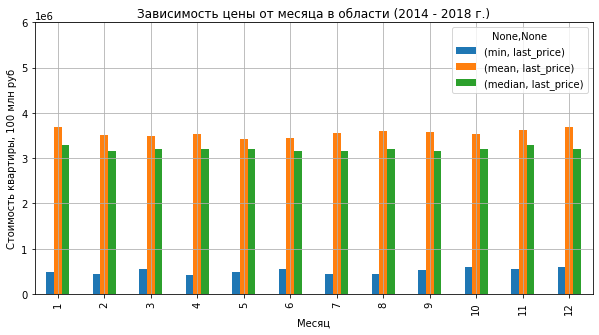

In [195]:
(data_other
 .pivot_table(index='month', values='last_price', aggfunc=['min', 'mean', 'median'])
 .plot(kind='bar', figsize=(10,5), yticks=range(0, 10**6*7, 10**6), 
       title='Зависимость цены от месяца в области (2014 - 2018 г.)', grid=True))
plt.xlabel('Месяц')
plt.ylabel('Стоимость квартиры, 100 млн руб')

Вывод: зависимость не прослеживается.

Text(0, 0.5, 'Стоимость квартиры, 100 млн руб')

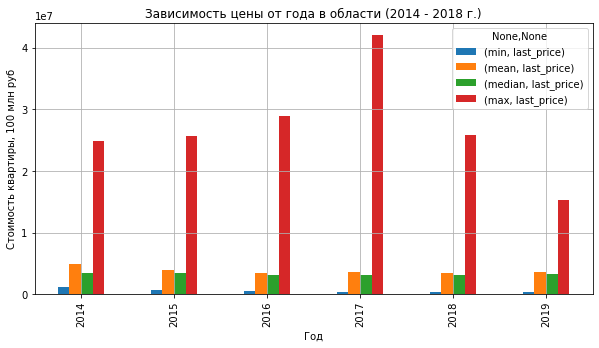

In [196]:
(data_other
 .pivot_table(index='year', values='last_price', aggfunc=['min', 'mean', 'median', 'max'])
 .plot(kind='bar', figsize=(10,5), yticks=range(0, 10**7*5, 10**7), 
       title='Зависимость цены от года в области (2014 - 2018 г.)', grid=True))
plt.xlabel('Год')
plt.ylabel('Стоимость квартиры, 100 млн руб')

Максимальная цена квартиры возрастала от 2014 к 2016 и был резкий скачек в 2017 году, после чего началось снижение.  
Уберем максимум.

Text(0, 0.5, 'Стоимость квартиры, 100 млн руб')

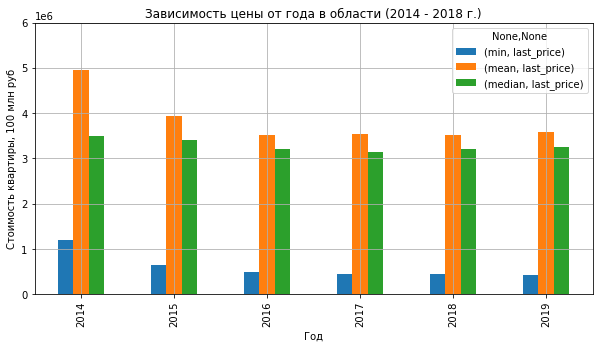

In [197]:
(data_other
 .pivot_table(index='year', values='last_price', aggfunc=['min', 'mean', 'median'])
 .plot(kind='bar', figsize=(10,5), yticks=range(0, 10**6*7, 10**6), 
       title='Зависимость цены от года в области (2014 - 2018 г.)', grid=True))
plt.xlabel('Год')
plt.ylabel('Стоимость квартиры, 100 млн руб')

Вывод:
* В отличие от Питера 2014 год практически не повлиял на стоимость жилья в области. Цены практически не менялись за все время исследования.

#### Выводы по изучению факторов, влияющих на продажи в Питере и области:
* Самое большое влияние оказывает площадь помещения. При этом в области влияние выше, чем в Питере.
* Количество комнат, как правило растет, при росте площади, поэтому влияние идет по аналогии с ней, но чуть меньше.
* Удаленность от центра крайне важна для Питера и практически не имеет значения для области.
* В Питере очень любят последние этажи, тогда как в регионах они наоборот самые дешевые. (хочу пентхауззз!)
* День недели практически не влияет на цену квартиры.
* Среди месяцев доминирует сентябрь и весна.
* В 2014 году, было резкое падение стоимости квартир в Питере, область отделалась легким испугом.

### Сравнение Санкт - Петербурга и 10 самых популярных населенных пунктов в области. <a id="fourth-f"></a>
Выберите 10 населённых пунктов с наибольшим числом объявлений. Посчитайте среднюю цену квадратного метра в этих населённых пунктах. Выделите населённые пункты с самой высокой и низкой стоимостью жилья. Эти данные можно найти по имени в столбце '*locality_name'*. "

##### Сперва посмотрим среднюю цену квадратного метра в Санкт - Петербурге.

In [198]:
round(data_spb['price_m2'].mean())

114032

In [199]:
data_spb['locality_name'].count()

14456

Потом надо будет объединить ее с регионами для удобства, поэтому сразу создадим подходящий DataFrame.

In [200]:
spb_mean_m2 = data_spb.pivot_table(index='locality_name', values='price_m2', aggfunc=['count', 'mean'])
spb_mean_m2.columns = ['count', 'mean']
spb_mean_m2.index = spb_mean_m2.index.astype('object')

В таблице по Питеру 14456 строки и средняя цена равна 114032 руб.  
Посмотрим на регионы. Найдем 10 насаленных пунктов с самым большим кол-вом объявлений.

In [201]:
other_mean_m2 = data_other.pivot_table(index='locality_name', values='price_m2', aggfunc=['count', 'mean'])
other_mean_m2.columns = ['count', 'mean']
other_mean_m2.index = other_mean_m2.index.astype('object')

In [202]:
general_mean_m2 = other_mean_m2.append(spb_mean_m2)
general_mean_m2.sort_values(by='count', ascending=False).head(11).round()

,count,mean
locality_name,,
Санкт-Петербург,14456,114032.0
посёлок Мурино,460,86333.0
посёлок Шушары,403,78750.0
Всеволожск,371,68880.0
Пушкин,345,103428.0
Колпино,328,75344.0
посёлок Парголово,301,90443.0
Гатчина,292,68627.0
деревня Кудрово,262,92702.0


Сохраним первые 11 позиций для удобства.

In [203]:
general_mean_m2_top_11 = general_mean_m2.sort_values(
    by='count', ascending=False)[ : 11].reset_index()
general_mean_m2_top_11 = general_mean_m2_top_11.sort_values(by='mean')
general_mean_m2_top_11

,locality_name,count,mean
10,Выборг,193,58190.332031
7,Гатчина,292,68627.367188
3,Всеволожск,371,68880.132812
5,Колпино,328,75344.093750
2,посёлок Шушары,403,78749.640625
9,Петергоф,197,84480.968750
1,посёлок Мурино,460,86333.164062
6,посёлок Парголово,301,90442.585938
8,деревня Кудрово,262,92702.187500
4,Пушкин,345,103428.484375


Теперь построим для них график.

Text(0, 0.5, 'Цена за квадратный метр, руб')

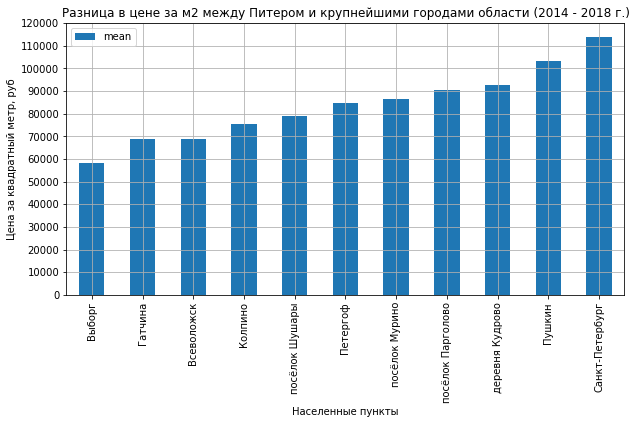

In [204]:
(general_mean_m2_top_11.plot(
    x='locality_name', y='mean', kind='bar', grid=True, figsize=(10,5), 
    yticks=range(0, 10**4*13, 10**4), 
    title='Разница в цене за м2 между Питером и крупнейшими городами области (2014 - 2018 г.)'))
plt.xlabel('Населенные пункты')
plt.ylabel('Цена за квадратный метр, руб')

#### Выводы:
* Как и ожидалось самый дорогой город во всей Ленинградской области - Санкт-Петербург с ценой 114 тыс. руб. за м2.
* Среди областных городов лидирует Пушкин с отставанием от Питера примерно на 10 тыс. руб. за м2.
* Топ 10 среди областных городов замыкает Выборг с ценой около 60 тыс. руб. за м2.

### Изучение влияния удаленности от центра города на стоимость квартиры в Санкт-Петербурге. <a id="fourth-d"></a>
Сперва создадим столбец с удаленностью от центра в км.

In [205]:
data_spb['dist_to_center_km'] = ((data_spb['city_center_nearest'] + 1000)/ 1000).astype(int)
data_spb['dist_to_center_km'].describe()

count    14456.000000
mean        12.092003
std          4.805376
min          1.000000
25%          9.000000
50%         13.000000
75%         15.000000
max         30.000000
Name: dist_to_center_km, dtype: float64

Отлично, теперь посчитаем среднюю цену за км, для этого добавим соответствующий столбец.

In [206]:
data_spb['price_to_center_km'] = (data_spb['last_price'] / data_spb['dist_to_center_km']).astype(int)
data_spb['price_to_center_km'].head()

0     764705
1     371142
2    1111111
3     337500
4     360714
Name: price_to_center_km, dtype: int64

Теперь создадим сводную таблицу.

In [207]:
spb_mean_price_km_center = data_spb.pivot_table(index='dist_to_center_km', 
                                                values='price_to_center_km', aggfunc='mean').reset_index()
spb_mean_price_km_center['price_to_center_km'] = spb_mean_price_km_center['price_to_center_km'].astype(int)
spb_mean_price_km_center.head()

,dist_to_center_km,price_to_center_km
0,1,23827989
1,2,9568380
2,3,5507609
3,4,3304348
4,5,2613536


Можно и график построить.

Text(0, 0.5, 'Расстояние до центра города, км')

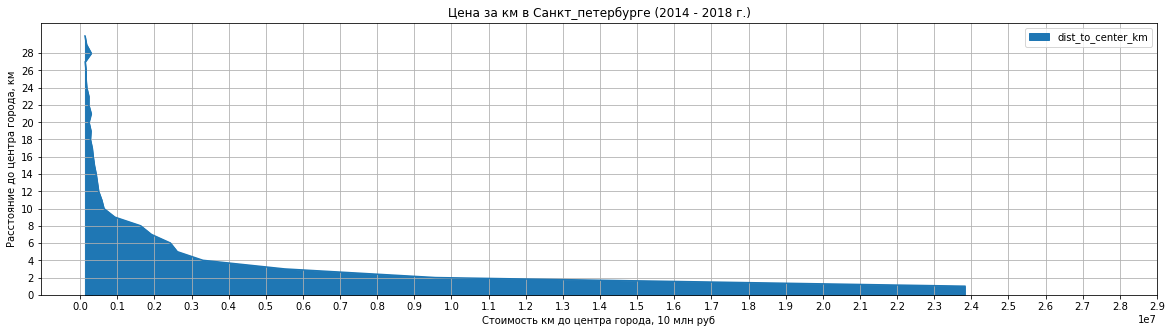

In [208]:
(spb_mean_price_km_center.plot(
    x='price_to_center_km', y='dist_to_center_km', kind='area', grid=True, 
    yticks=range(0, 30, 2), xticks=range(0, 10**7*3, 10**6), 
    title='Цена за км в Санкт_петербурге (2014 - 2018 г.)', figsize=(20,5)))
plt.xlabel('Стоимость км до центра города, 10 млн руб')
plt.ylabel('Расстояние до центра города, км')

#### Выводы:
* Судя по всему центром города считают зону в радиусе 4 км.

### Изучение квартир в центре Санкт-Петербурга <a id="fourth-e"></a>
Мы планируем изучить:
* площадь квартир
* цену
* число комнат
* высоту потолков
  
Так же выделить факторы, которые влияют на стоимость:
* число комнат
* этаж
* удаленность от центра
* дата размещения объявления
  
Сравнить с общими выводами по городу.

---

Сперва отфильтруем квартиры в радиусе 4 км.

In [209]:
spb_radius_4 = data_spb.query('dist_to_center_km < 5')
spb_radius_4['dist_to_center_km'].describe()

count    1093.000000
mean        3.103385
std         0.970875
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         4.000000
Name: dist_to_center_km, dtype: float64

#### Изучаем площадь, цену, кол-во комнат и высоту потолков.

In [210]:
data_spb[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,14456.000000,14456.0,14456.000000,14456.000000
mean,64.165794,7909836.0,2.174875,2.762276
std,38.601490,12887229.0,1.147506,0.241105
min,12.000000,1190000.0,0.000000,2.400000
25%,42.000000,4200000.0,1.000000,2.600000
50%,55.000000,5500000.0,2.000000,2.764488
75%,74.000000,8000000.0,3.000000,2.764488
max,900.000000,763000000.0,19.000000,6.000000


In [211]:
spb_radius_4[['total_area', 'last_price', 'rooms', 'ceiling_height']].describe()

,total_area,last_price,rooms,ceiling_height
count,1093.000000,1093.0,1093.000000,1093.000000
mean,97.551781,16090182.0,3.111619,3.064853
std,55.692997,33591272.0,1.561435,0.367255
min,12.000000,2100000.0,0.000000,2.450000
25%,62.299999,7000000.0,2.000000,2.764488
50%,84.099998,9500000.0,3.000000,3.000000
75%,115.099998,14500000.0,4.000000,3.300000
max,517.000000,763000000.0,19.000000,5.800000


Краткие выводы:
* Средняя площадь жилья в центре на 33 квадрата больше, чем в целом по Санкт_петербургу.
* Средняя стоимость жилья примерно в 2 раза выше, чем в целом по Санкт_петербургу.
* Среднее кол-во комнат по Санкт-петербургу - 2, по его центру - 3.
* Средняя высота потолков в центре выше на 10% и составляет 3 метра.

#### Изучаем факторы, которые влияют на стоимость: число комнат, этаж, удаленность от центра, дата размещения объявления.

In [212]:
spb_radius_4[['last_price', 'total_area', 'rooms', 'city_center_nearest', 'dow', 'month', 'year']].corr()

,last_price,total_area,rooms,city_center_nearest,dow,month,year
last_price,1.000000,0.532159,0.241979,-0.097543,0.026969,-0.014625,-0.037869
total_area,0.532159,1.000000,0.754593,-0.111296,0.002644,-0.041614,-0.082121
rooms,0.241979,0.754593,1.000000,-0.052316,0.003614,-0.058914,-0.049767
city_center_nearest,-0.097543,-0.111296,-0.052316,1.000000,-0.026693,-0.004461,0.068626
dow,0.026969,0.002644,0.003614,-0.026693,1.000000,0.002710,-0.038498
month,-0.014625,-0.041614,-0.058914,-0.004461,0.002710,1.000000,-0.221434
year,-0.037869,-0.082121,-0.049767,0.068626,-0.038498,-0.221434,1.000000


Краткие выводы:
* С ростом стоимости квартиры, растет и ее площадь.
* То же самое относится к комнатам.
* Чем ближе центр, тем выше стоимость.

##### Зависимость стоимости квартиры от ее площади.

Text(0.5, 0, 'Стоимость квартиры, 100 млн руб')

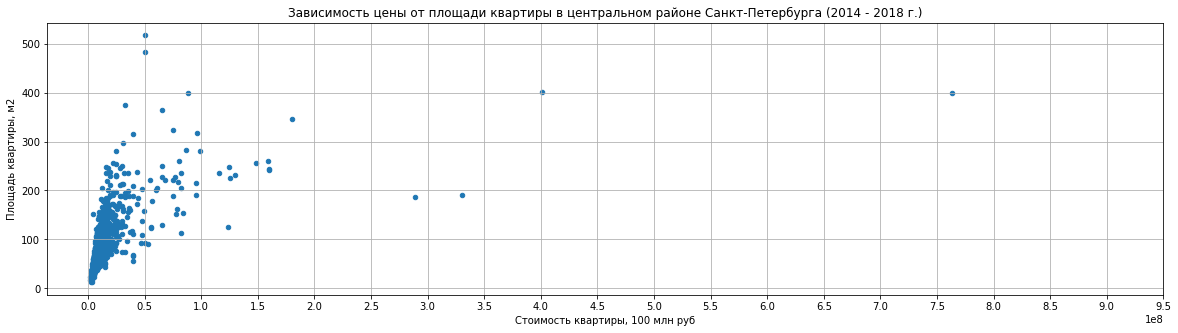

In [213]:
spb_radius_4.sort_values(by='last_price').plot(
    kind='scatter', x = 'last_price', y = 'total_area', figsize=(20, 5), 
    xticks=range(0, 10**9, 10**7*5), 
    title='Зависимость цены от площади квартиры в центральном районе Санкт-Петербурга (2014 - 2018 г.)', 
    grid=True)
plt.ylabel('Площадь квартиры, м2')
plt.xlabel('Стоимость квартиры, 100 млн руб')

Вывод:
* Рост площади слабо влияет на стоимость квартиры, за одни и те же деньги можно спокойно найти квартиру в несколько раз больше по площади.
* Самые дорогие квартиры не самые большие по площади, но входят в топ 5.

##### Посмотрим зависимость стоимости квартиры от количества комнат

Text(0, 0.5, 'Стоимость квартиры, 100 млн руб')

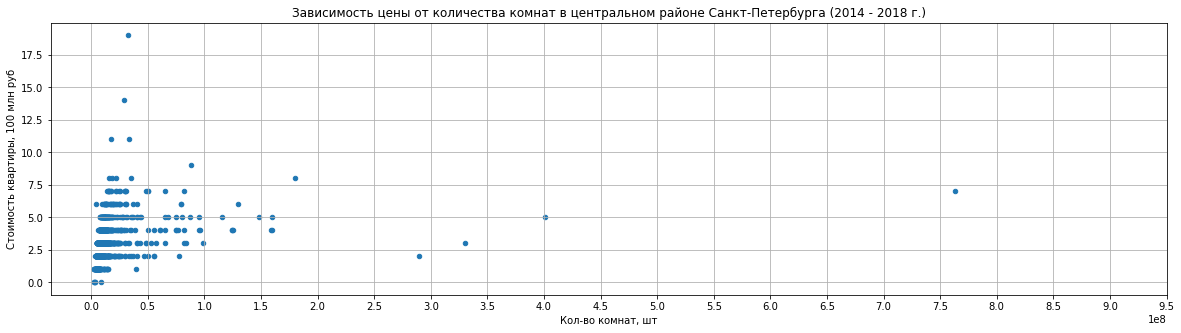

In [214]:
spb_radius_4.sort_values(by='last_price').plot(
    kind='scatter', x = 'last_price', y = 'rooms', figsize=(20, 5), 
    xticks=range(0, 10**9, 10**7*5), 
    title='Зависимость цены от количества комнат в центральном районе Санкт-Петербурга (2014 - 2018 г.)', 
    grid=True)
plt.xlabel('Кол-во комнат, шт')
plt.ylabel('Стоимость квартиры, 100 млн руб')

Вывод:  
* Зависимость крайне слабая в пределах 50 млн. руб можно купить квартиру с любым кол-вом комнат из доступных по выборке, в том числе и максимальным.

##### Посмотрим зависимость стоимости квартиры от категории этажа: первый, последний, другой.

Text(0, 0.5, 'Этаж')

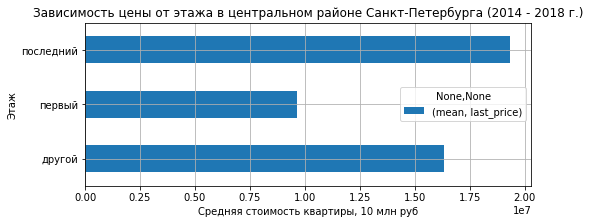

In [215]:
(spb_radius_4
 .pivot_table(index='floor_cat', values='last_price', aggfunc=['mean'])
 .plot(kind='barh', figsize=(8,3), yticks=range(0, 10**7, 10**6), 
       title='Зависимость цены от этажа в центральном районе Санкт-Петербурга (2014 - 2018 г.)', grid=True))
plt.xlabel('Средняя стоимость квартиры, 10 млн руб')
plt.ylabel('Этаж')

Выводы:
* Стоимость жилья, по возрастанию: последний, другой, ппервый.

##### Посмотрим зависимость стоимости квартиры от удаленности от центра города.

Text(0.5, 0, 'Стоимость квартиры, 100 млн руб')

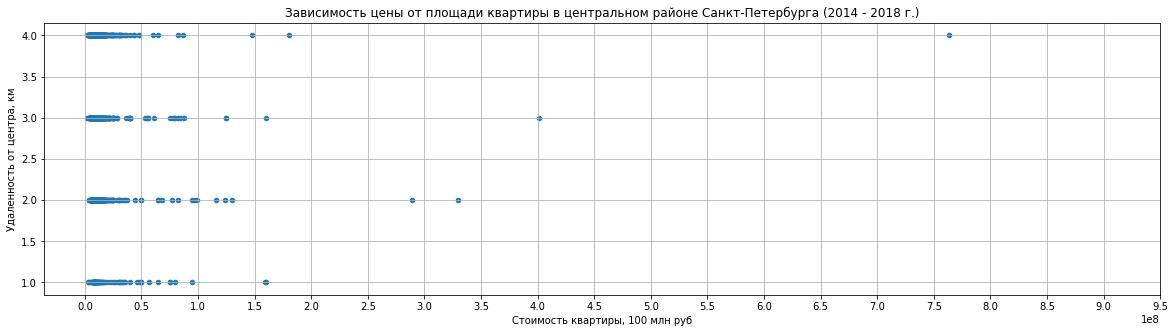

In [216]:
spb_radius_4.sort_values(by='last_price').plot(
    kind='scatter', x = 'last_price', y = 'dist_to_center_km', figsize=(20, 5), xticks=range(0, 10**9, 10**7*5), 
    title='Зависимость цены от площади квартиры в центральном районе Санкт-Петербурга (2014 - 2018 г.)', grid=True)
plt.ylabel('Удаленность от центра, км')
plt.xlabel('Стоимость квартиры, 100 млн руб')

Вывод:  
* Удаленность от центра города совсем не влияет, тут везде центр.

##### Посмотрим зависимость стоимости квартиры от даты размещения: день недели, месяц, год.

Text(0, 0.5, 'День недели')

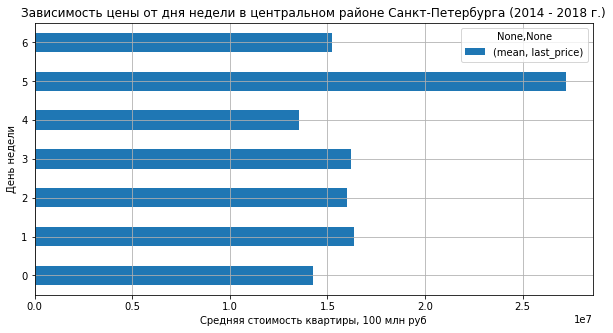

In [217]:
(spb_radius_4
 .pivot_table(index='dow', values='last_price', aggfunc=['mean'])
 .plot(kind='barh', figsize=(10,5), yticks=range(0, 10**9, 10**7*5), 
       title='Зависимость цены от дня недели в центральном районе Санкт-Петербурга (2014 - 2018 г.)', grid=True))
plt.xlabel('Средняя стоимость квартиры, 100 млн руб')
plt.ylabel('День недели')

Выводы: 
* Среднее показывает, что самый лучший день для размещения считают собботу.  
* Но это искаженные данные, т.к. в этот день была размещена квартира с самой большой ценой.  
* В целом разницы нет, все дни одинаковые.

Text(0, 0.5, 'Месяц')

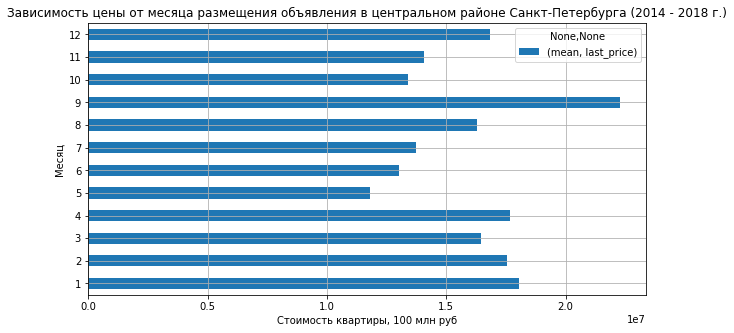

In [218]:
(spb_radius_4
 .pivot_table(index='month', values='last_price', aggfunc=['mean'])
 .plot(kind='barh', figsize=(10,5), yticks=range(0, 10**9, 10**7*5), 
       title='Зависимость цены от месяца размещения объявления в центральном районе Санкт-Петербурга (2014 - 2018 г.)', 
       grid=True))
plt.xlabel('Стоимость квартиры, 100 млн руб')
plt.ylabel('Месяц')

Вывод: 
* Сентябрь все так же выступает из-за самой дорогой квартиры.
* В остальном самые дорогиеобъявления появляются с декабря по апрель включительно.
* Самые дешевые квартиры выставляют в мае.

Text(0.5, 0, 'Стоимость квартиры, 100 млн руб')

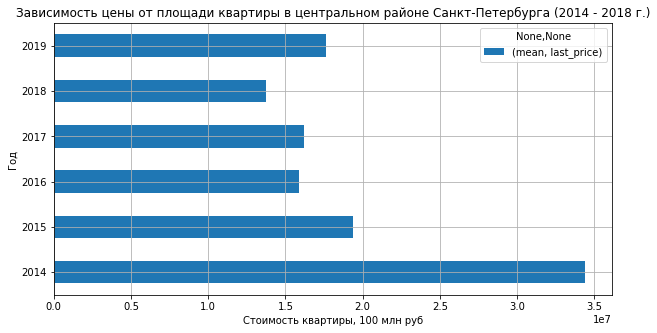

In [219]:
(spb_radius_4
 .pivot_table(index='year', values='last_price', aggfunc=['mean'])
 .plot(kind='barh', figsize=(10,5), yticks=range(0, 10**9, 10**7*5), 
       title='Зависимость цены от площади квартиры в центральном районе Санкт-Петербурга (2014 - 2018 г.)', 
       grid=True))
plt.ylabel('Год')
plt.xlabel('Стоимость квартиры, 100 млн руб')

Вывод:
* Самая высокая средняя цена была в 2014 году, после чего произошел резкий спад.
* С 2015 года было небольшое снижение цены до 2017 года, но потом цены почти восстановились на уровень 2015 года.

#### Выводы:

Квартиры в центре в среднем выше качеством, чем в целом по Санкт-Петербургу. Это включает в себя:  
* Средняя площадь квартир больше в 1.5 раза.
* В квартире, как правило больше на одну комнату.
* Потолки 3 метровые, против 2.7 в целом по Санкт-Петербургу.
* Ну и цены соответственно в 2 раза выше, за тот же метраж.

Если сравнивать влияние факторов на стоимость квартиры в Санкт-Петербурге и в центре, то есть несколько различий:
* В центре практически нет фактора влияния удаленности от центра города.
* Площадь квартиры так же имеет меньшее влияние, как и кол-во комнат.
* Квартиры в центре продаются по более высокой цене с декабря по апрель, примерно как и в остальном Санкт-Петербурге.
* День недели не влияет на стоимость квартиры во всем Санкт-Петербурге.
* В 2014 году были самые высокие цены на квартиры по всему Санкт-Петербургу.

## Общий вывод <a id="fifth"></a>

В этом проекте мы изучили данные по продаже недвижимости в Санкт-Петербурге и Ленинградской области в период за 2014 - 2018 годы.
В самом начале разбора проекта мы приняли решение отделить данные по Санкт-Петербургу от данных по области. Так мы исключили влияние Санкт-Петербурга, который имеет наибольшее колчиство объявлений, на показатели по области. По этой причине работа проведенная нами была чуть больше.  
  
Частично эти данные заполнялись человеком (например площадь квартиры), остально подтягивалось автоматически (например расстояние до центра города).  
По этой причине в данных оказалось очень много пропущенных значений, часть из которых нам удалось обработать, другую мы оставили в первозданном виде.
  
Нам пришлось удалить несколько строк, значения в которых резко контратировалии с общими данными, так мы смогли улучшить чистоту выборки.  
  
---
Закончив предобработку данных, мы добавили в таблицу несколько столбцов:
* цена квадратного метра
* день недели, месяц и год публикации объявления
* этаж квартиры; варианты — первый, последний, другой
* соотношение жилой и общей площади, а также отношение площади кухни к общей

---

Далее мы изучили представленные в таблице параметры:
* площадь
* цену
* число комнат
* высоту потолков
И построили гистограмму для каждого из них.

Выводы:  
* В Питере представлены квартиры, способные удовлетворить любые потребности, тогда как в области преобладают однотивные квартиры небольшой площади.
* Высота потолков как в Питере, так и в области равна 2.7 метра, при этом в области максимальная высота потолков сотавляет 4,5 метра, а в Питере 6.
* В области преобладают квартиры с 1-2 комнатами, в Питере квартиры с 1, 2, 3 комнатами представлены в равных долях.
* Цена квартиры в Питере значительно превышает цену в области. Хотя есть населенные пункты, недалеко от Питера, где цены не многим ниже окраин северной столицы.

---

Изучив скорость продажи квартир, мы пришли к выводам:
* Половина квартир продается в первые 3 месяца.
* Примерно 15% Продается в первый месяц, мы можем назвать это быстрой продажей.
* Около 12% квартир продается больше года, их мы можем отнести к долгим продажам.
* В выборке присутствуют квартиры которые продавались свыше 4х лет.
* В первые 90 дней мы можем наблюдать пики продаж на 30, 45, 60 и 90 днях, при этом с 30 до 60 эти пики растут, а далее спадают.
* В первые 90 дней ежедневно продается около 50 квартир.

---

Так же мы изучили от чего зависит цена квартиры.  
Как и предполагалось основная зависимость заключается в размере площади, но непосредственно в Санкт-Петербурге так же огромное влияние на цену оказывает удаленность от центра города.  
Как в области, так и Питере самые дешевые квартиры расположены на первом этаже, при этом в Питере последние этажи стоят дороже прочих, а в области они менее популярны, чем прочие.  
Так же мы заметили, что квартиры по более дорогим ценам выставляются в сентябре и с декабря по апрель включительно.  
В 2014 году цена на квартиры была самая высокая, после чего произошел резкий спад на 20%.

---

Мы смогли изучить среднюю цену квартир в Питере и 10 крупнейших населенных пунктов области.
Выводы:
* Как и ожидалось самый дорогой город во всей Ленинградской области - Санкт-Петербург с ценой 114 тыс. руб. за м2.
* Среди областных городов лидирует Пушкин с отставанием от Питера примерно на 10 тыс. руб. за м2.
* Топ 10 среди областных городов замыкает Выборг с ценой около 60 тыс. руб. за м2.

---

Мы выяснили, что центром в Санкт-Петербурге является область с радиусом 4 км.

---

Сравнив параметры, которые влияют на стоимость недвижимости в центре Санкт-Петербурга с параметрами в целом по городу, мы пришли к выводам:
* В выборке по центру города практически нет фактора влияния удаленности от центра города.
* В центре города влияние площади квартиры на цену меньше.

---

В целом исследование было очень интересным, хоть и трудоемким)